# Project 2 - Car Insurance Claim Prediction

## 5.1 Software/Library Installation 

•	Python Website, https://www.python.org/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  


Let's start by reading the data into a pandas DataFrame.


In [49]:
import pandas as pd
data = pd.read_csv('data/train.csv')

print(data.head())
data.info(verbose = True)

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

We can already see that there are no null columns, so we don't need to worry about that.
Also, memory usage is acceptable so we can use all the data in the training set.
<br>
The policy_id column is unique for each object, so it won't be of much help for finding patterns in the data. Furthermore, the policy_ids for the data to which the model will be applied to will be different, so we decided to drop it.

In [50]:
data.drop("policy_id",axis=1,inplace=True)
print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_brake_assist is_power_door_locks  is_central_locking is_power_steering  \
0              No                  No                  No               Y

The dataset includes max_torque and max_power in the format 60Nm@3500rpm and 40.36bhp@6000rpm, respectively. Instead of just using one-hot encoding and increasing the dimensionality tremendously, we decided to split each of these two labels into two labels of their own (i.e. 4 labels in total).

In [51]:
data["max_torque_Nm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
data["max_torque_rpm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

data["max_power_bhp"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
data["max_power_rpm"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

#Drop original cols
data.drop(["max_torque","max_power"],axis=1,inplace=True)

print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type         engine_type  ...  \
0                4990     1       A    M1       CNG   F8D Petrol Engine  ...   
1               27003     1       A    M1       CNG   F8D Petrol Engine  ...   
2                4076     1       A    M1       CNG   F8D Petrol Engine  ...   
3               21622     1      C1    M2    Petrol  1.2 L K12N Dualjet  ...   
4               34738     2       A    M3    Petrol             1.0 SCe  ...   

   is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                No           

A lot of labels were binary but represented as Yes/No rather than 1/0, so we decided to replace Yes with True and No with False, making the column of type boolean rather than String

In [52]:
data = data.replace({ "No" : False , "Yes" : True })
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  bool   
 12  is_a

<Axes: xlabel='is_claim', ylabel='count'>

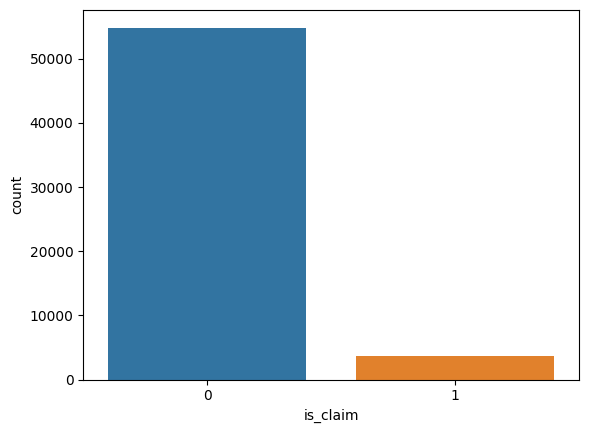

In [6]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
sb.countplot(x='is_claim',data=data)

As we can see, the data is extremely skewed, which means we will need to balance it before applying the algorithms.

C:\Users\filip\AppData\Local\Temp\ipykernel_20112\584675540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),annot=True)


<Axes: >

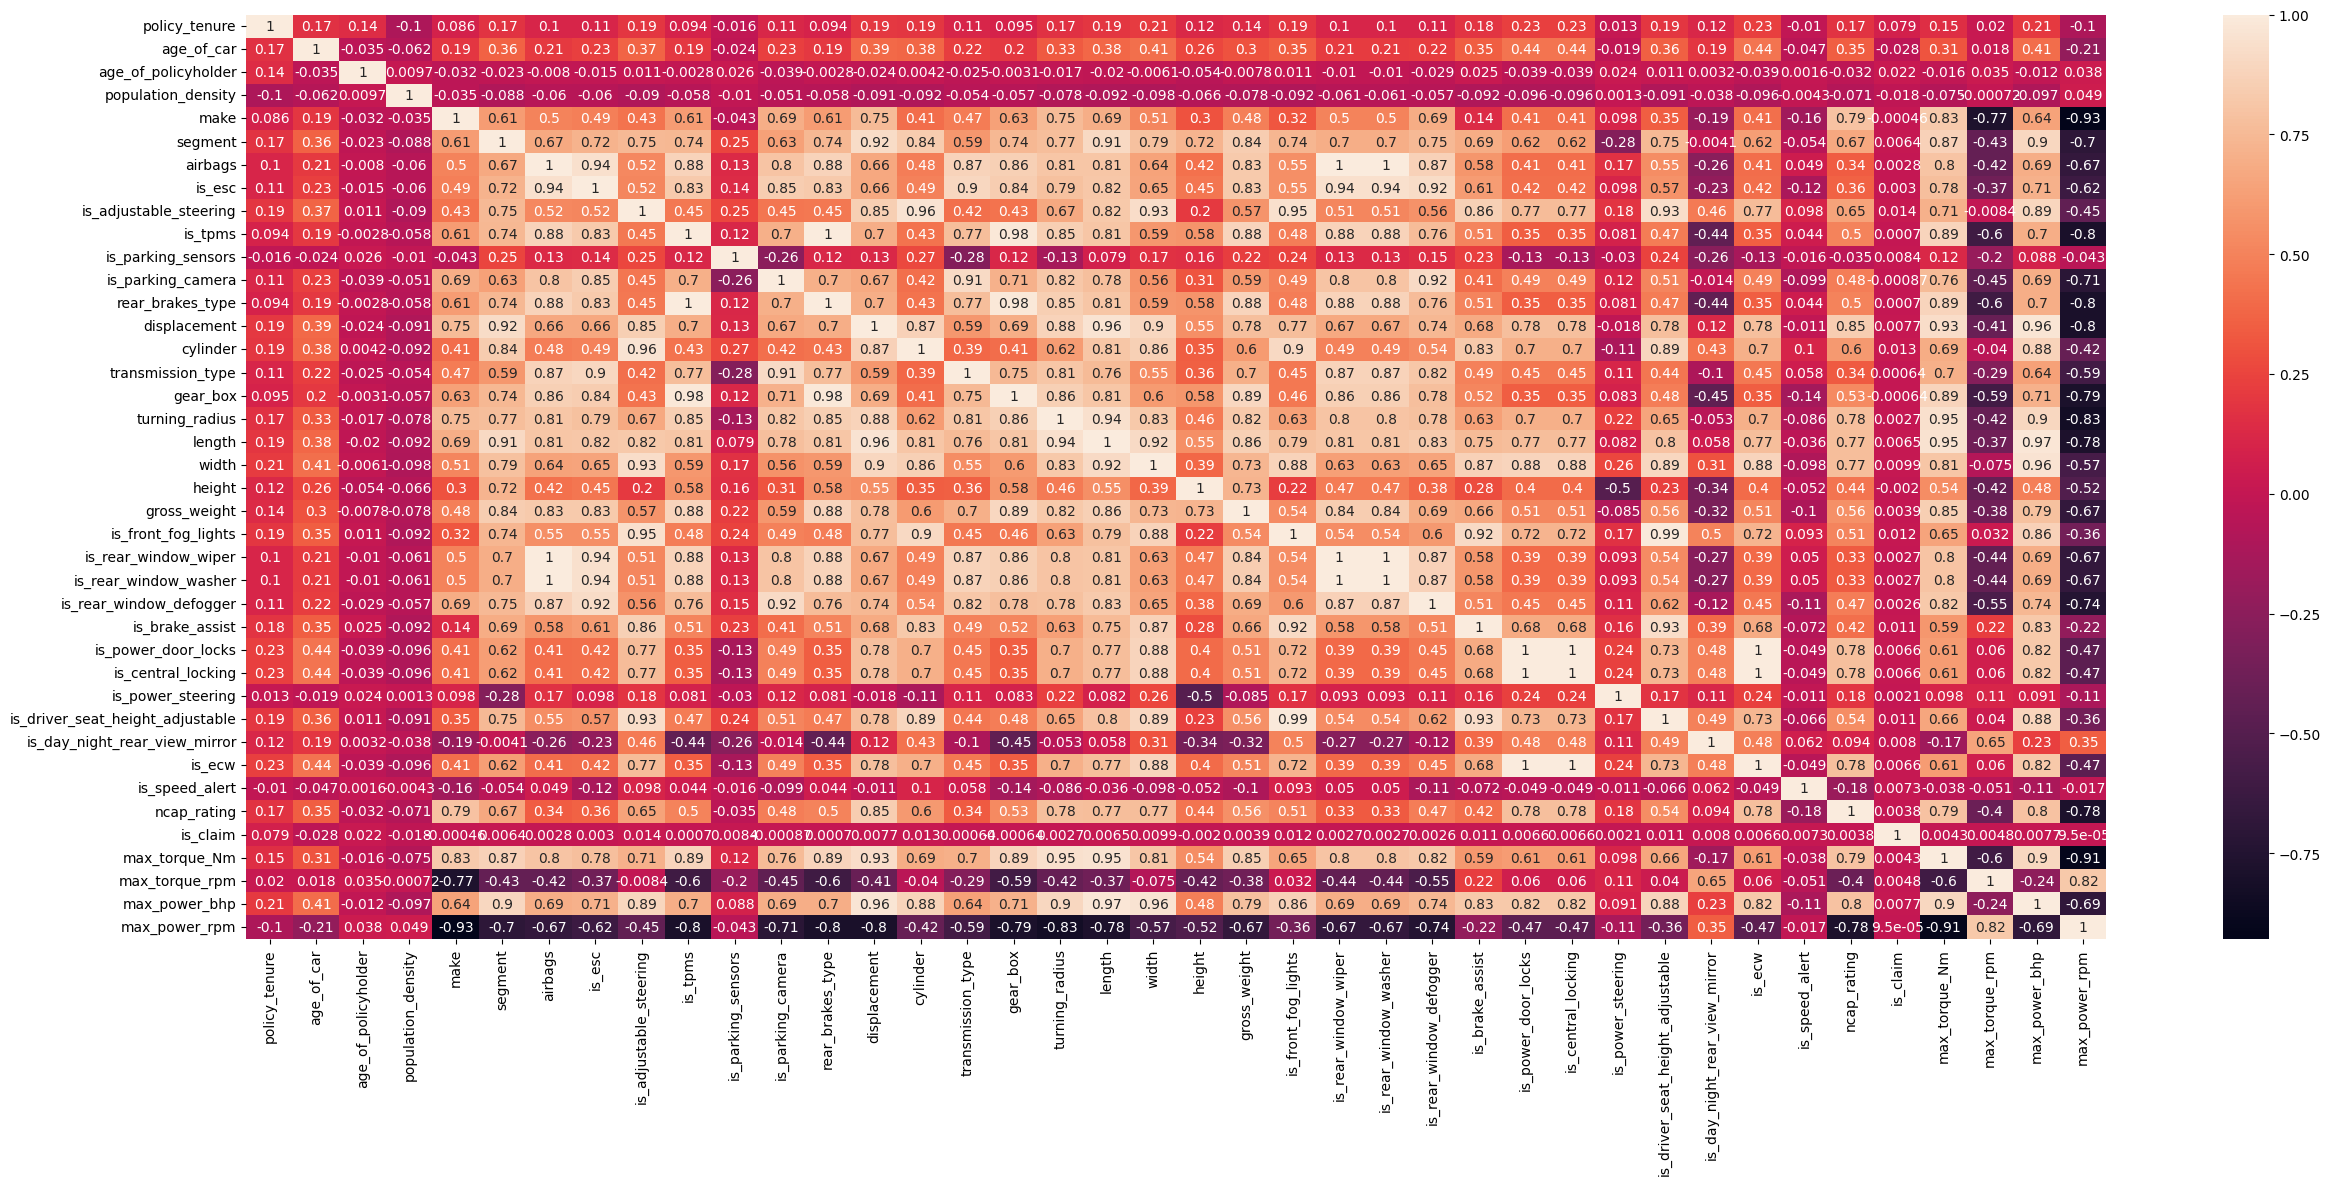

In [7]:
plt.figure(figsize=(30,12))
sb.heatmap(data.corr(),annot=True)


Let's split the attributes into categorical attributes and numerical attributes

In [8]:
cat_list=[]
num_list=[]

for i in data.columns:
    unique_val=len(data[i].unique())
    
    if unique_val<15:
        cat_list.append(i)
    else:
        num_list.append(i)


num_list.remove("area_cluster")
cat_list.append("area_cluster")
print(cat_list)
print(num_list)

['make', 'segment', 'model', 'fuel_type', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'area_cluster']
['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']


C:\Users\filip\AppData\Local\Temp\ipykernel_20112\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


<Figure size 800x600 with 0 Axes>

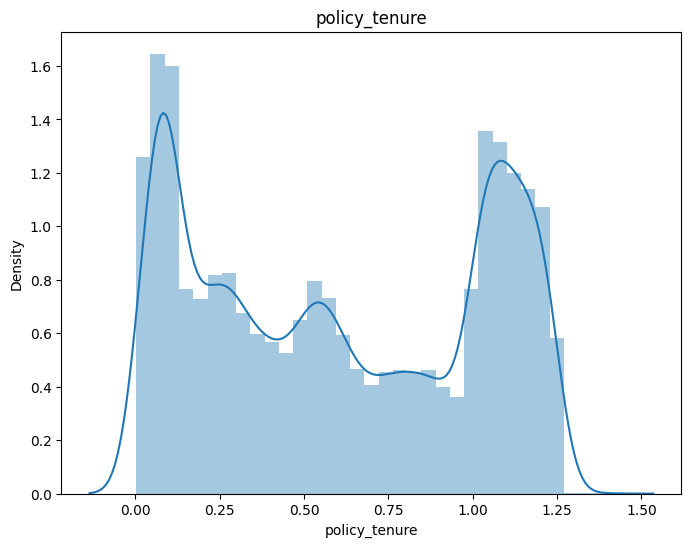

C:\Users\filip\AppData\Local\Temp\ipykernel_20112\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


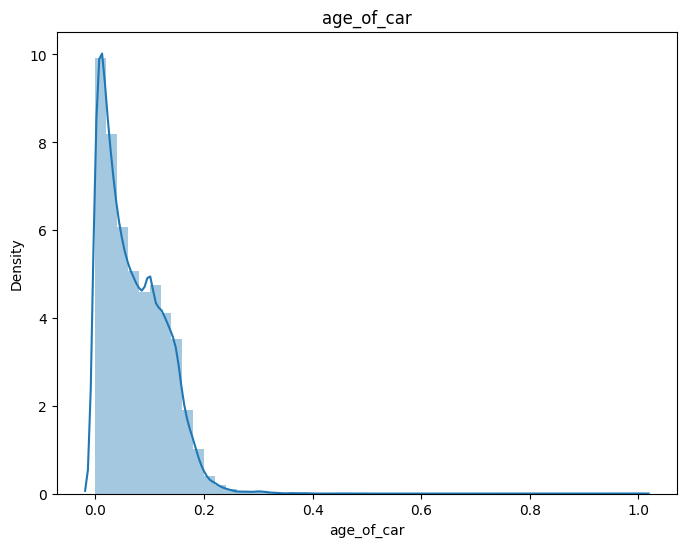

C:\Users\filip\AppData\Local\Temp\ipykernel_20112\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


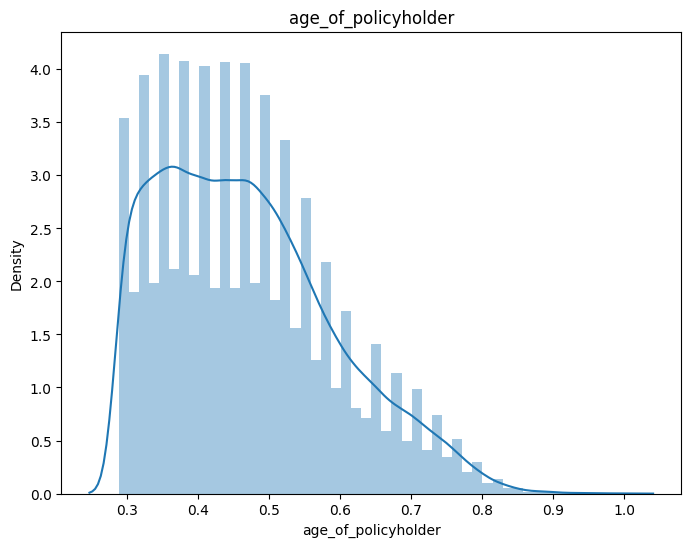

C:\Users\filip\AppData\Local\Temp\ipykernel_20112\3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


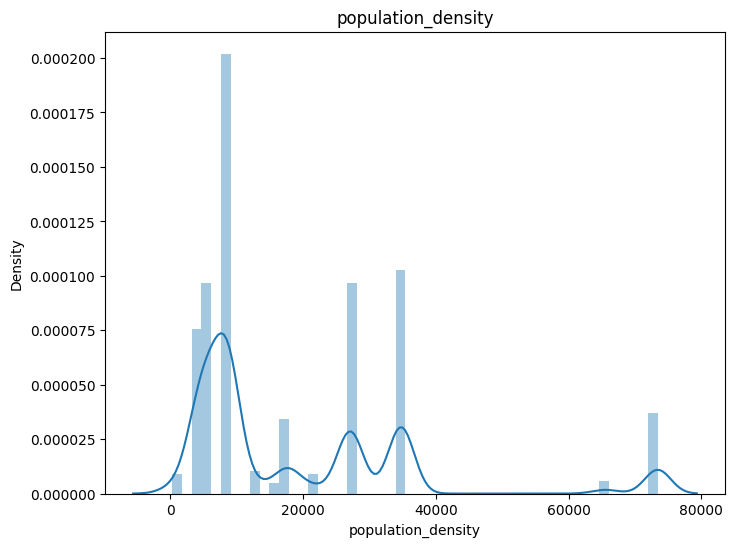

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 6))  # Set the individual figure size

plt.suptitle("Distribution of Numerical Values")

for i in data.loc[:, num_list]:
    plt.figure(figsize=(8, 6))  # Set the individual figure size for each plot
    sb.distplot(data[i])
    plt.title(i)
    plt.show()

As we can see, there seem to be some outliers in the age_of_car. Let's further analyze this column.

In [67]:
from collections import Counter

print(f"99.5 percentile for age_of_car {data.age_of_car.quantile(0.995)}")
extreme_age_of_car_indices = data.age_of_car > data.age_of_car.quantile(0.995)
extreme_is_claim_counts = Counter(data.loc[extreme_age_of_car_indices].is_claim)
print("Number of extreme values to be removed: ", sum(extreme_age_of_car_indices))

99.5 percentile for age_of_car 0.9166666666666667
Number of extreme values to be removed:  155


99.5% of cars have a normalized age under 0.24. We decided to remove every entry whose age_of_car column has over this value, and renormalize the data.

C:\Users\filip\AppData\Local\Temp\ipykernel_20112\840333840.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['age_of_car'])


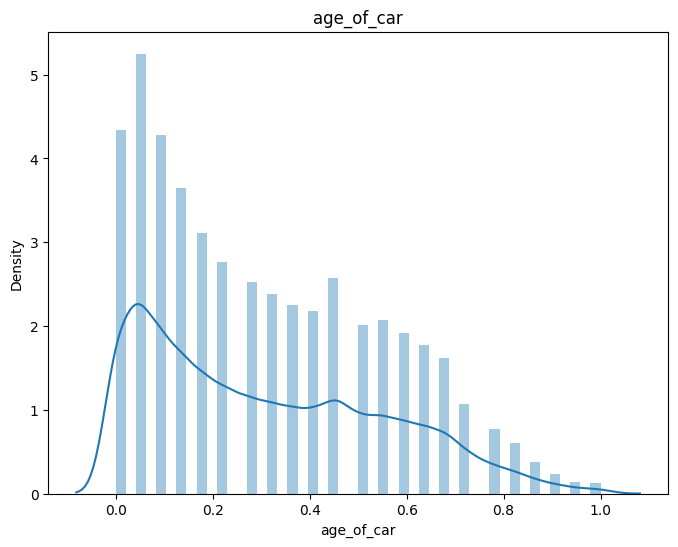

In [68]:
data = data.loc[~extreme_age_of_car_indices]
age_min = data['age_of_car'].min()
age_max = data['age_of_car'].max()

# Perform min-max scaling to normalize the column
data['age_of_car'] = (data['age_of_car'] - age_min) / (age_max - age_min)

plt.figure(figsize=(8, 6))  # Set the individual figure size for each plot
sb.distplot(data['age_of_car'])
plt.title('age_of_car')
plt.show()

Now that we analyzed the data, we can start creating the models. First let's split the data into train and test data. Each of this groups also needs to be split into inputs and labels

C:\Users\filip\AppData\Local\Temp\ipykernel_20112\4186395640.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(13,13))


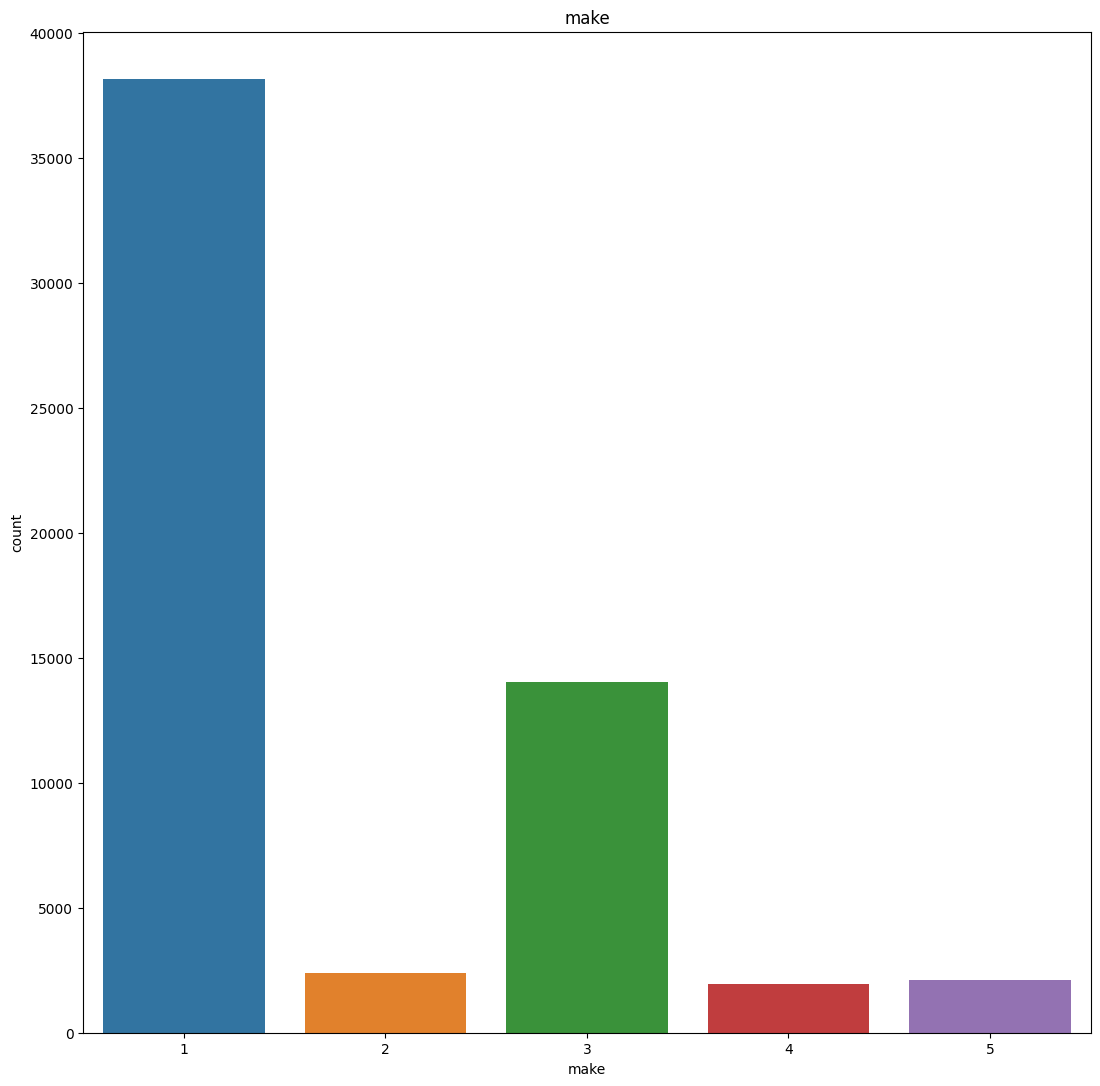

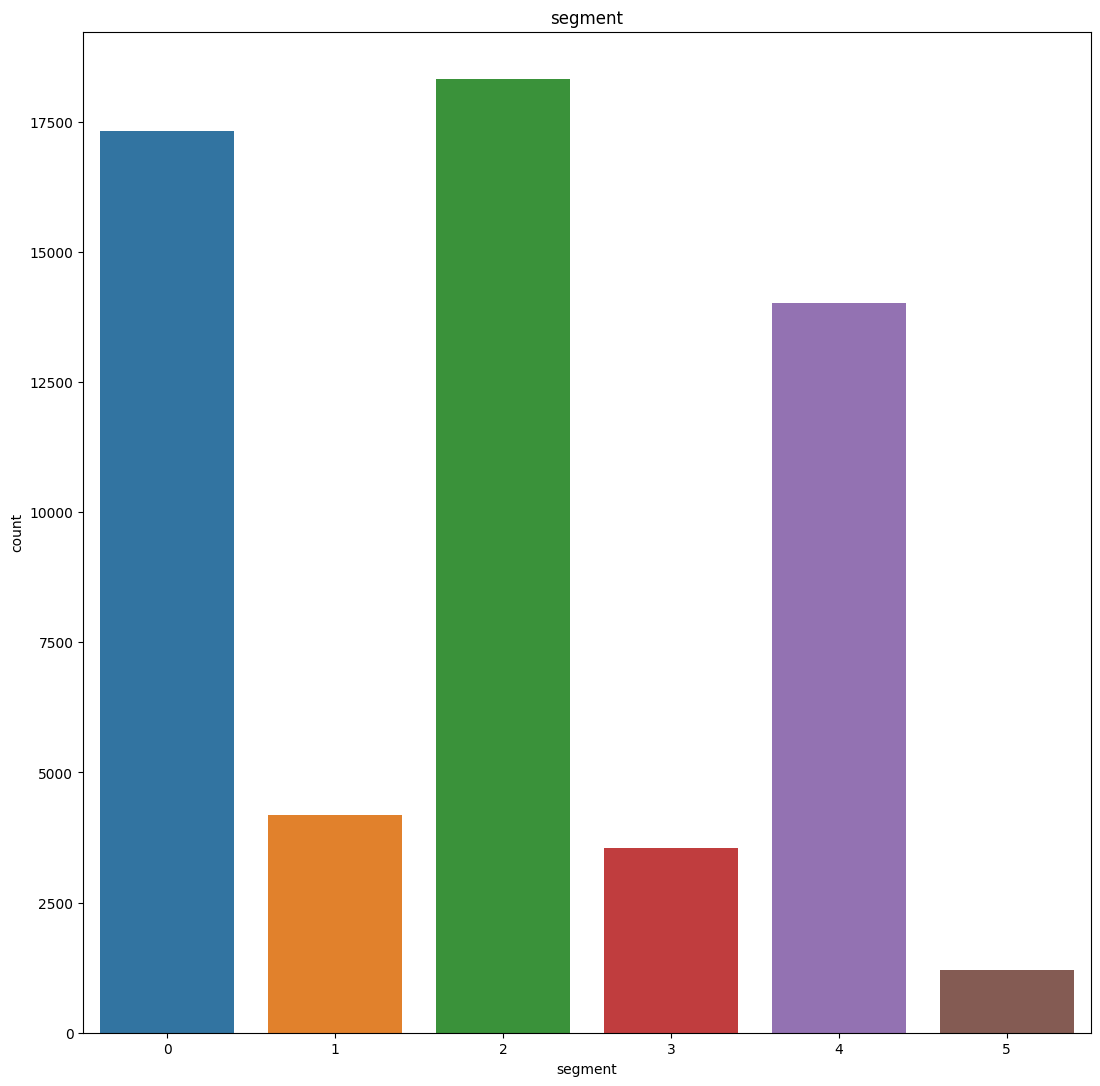

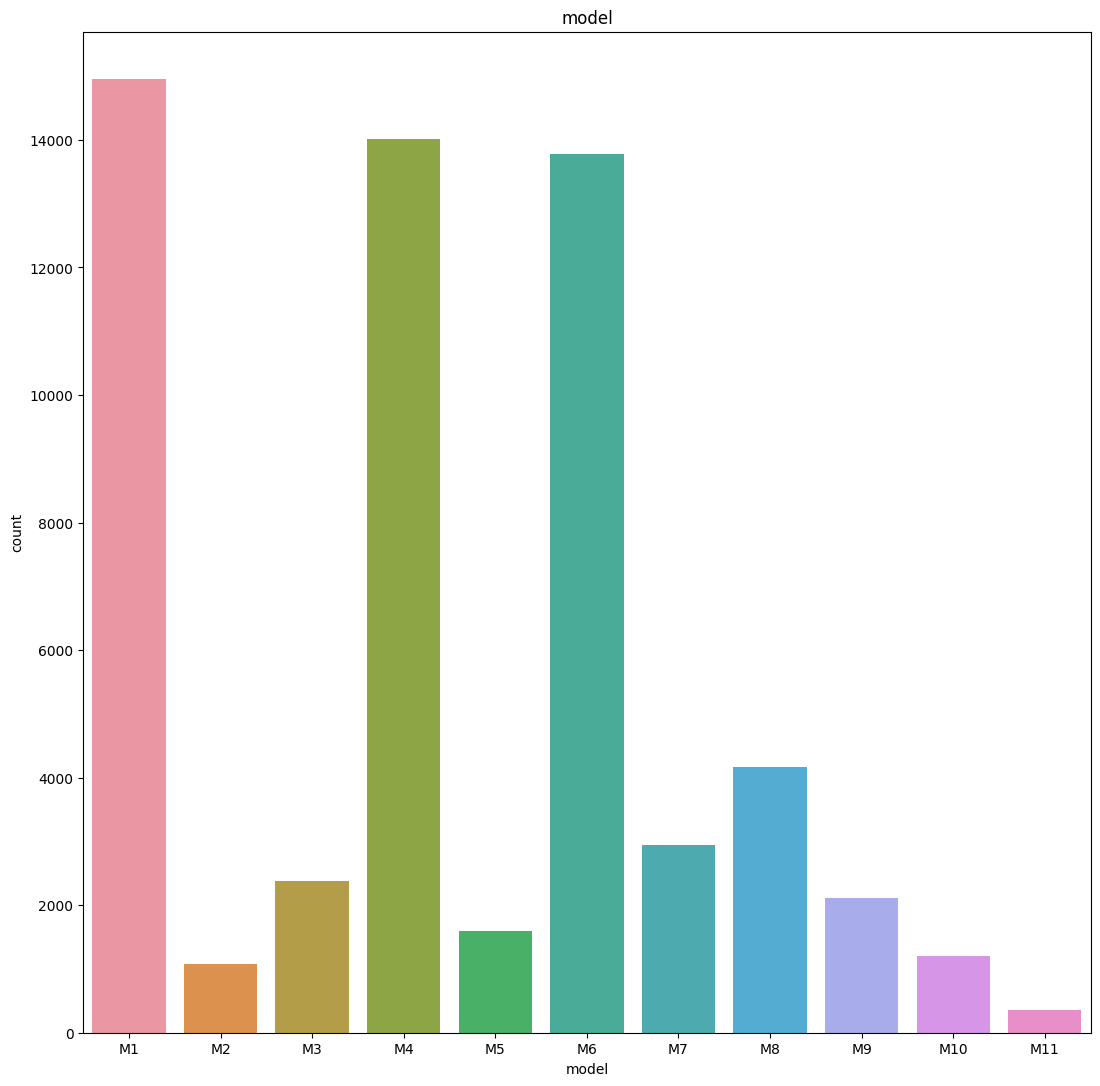

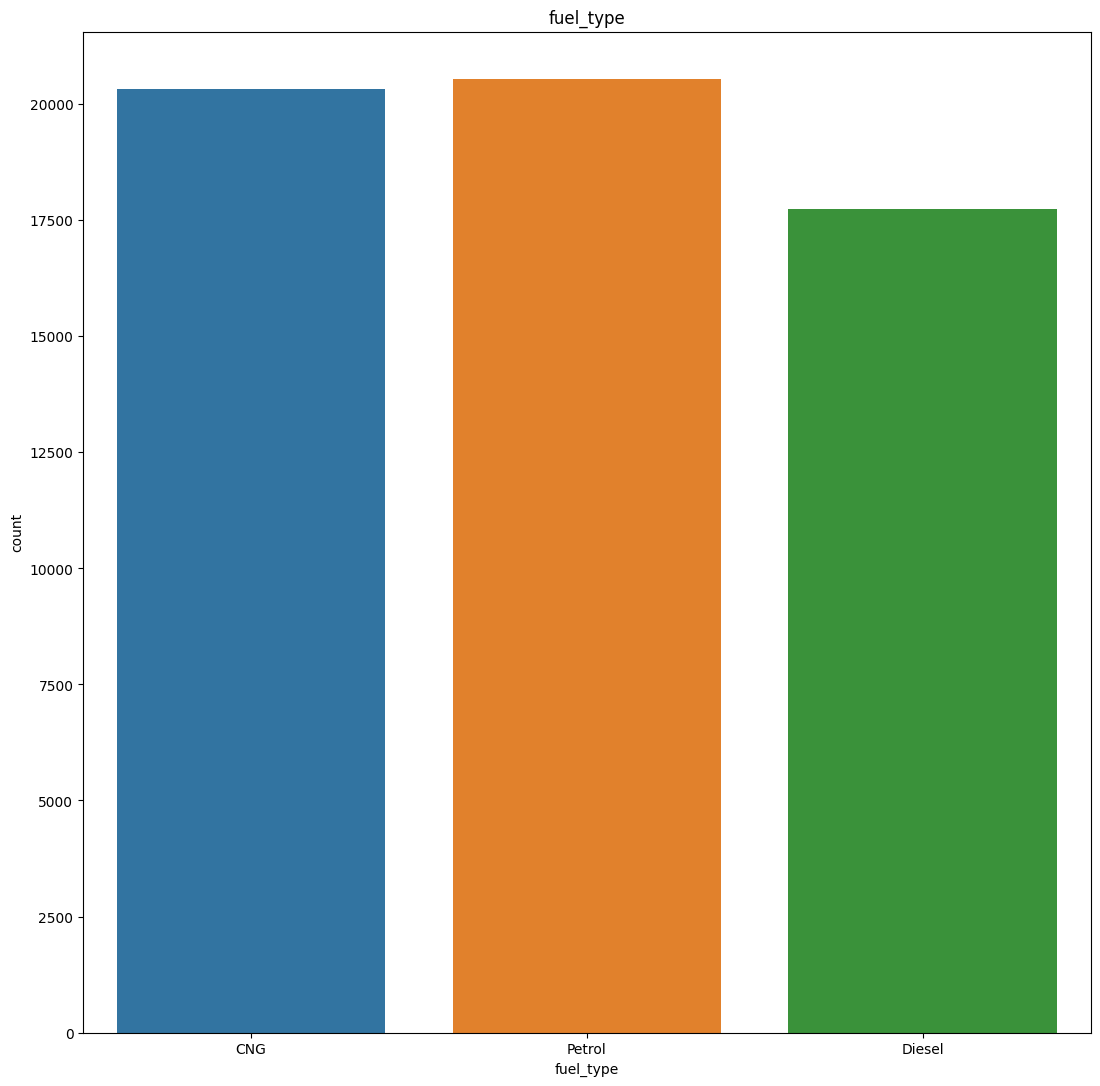

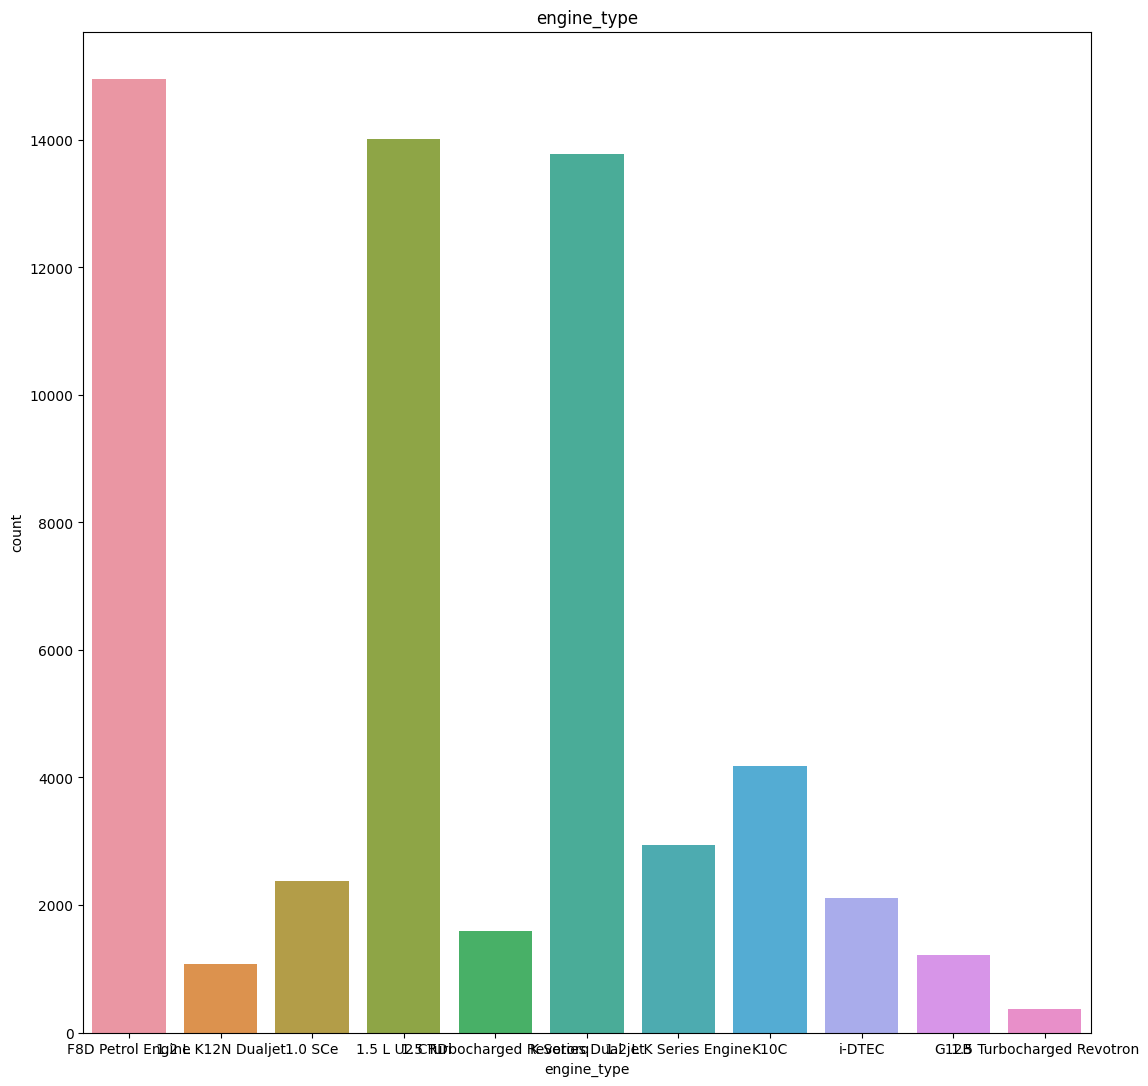

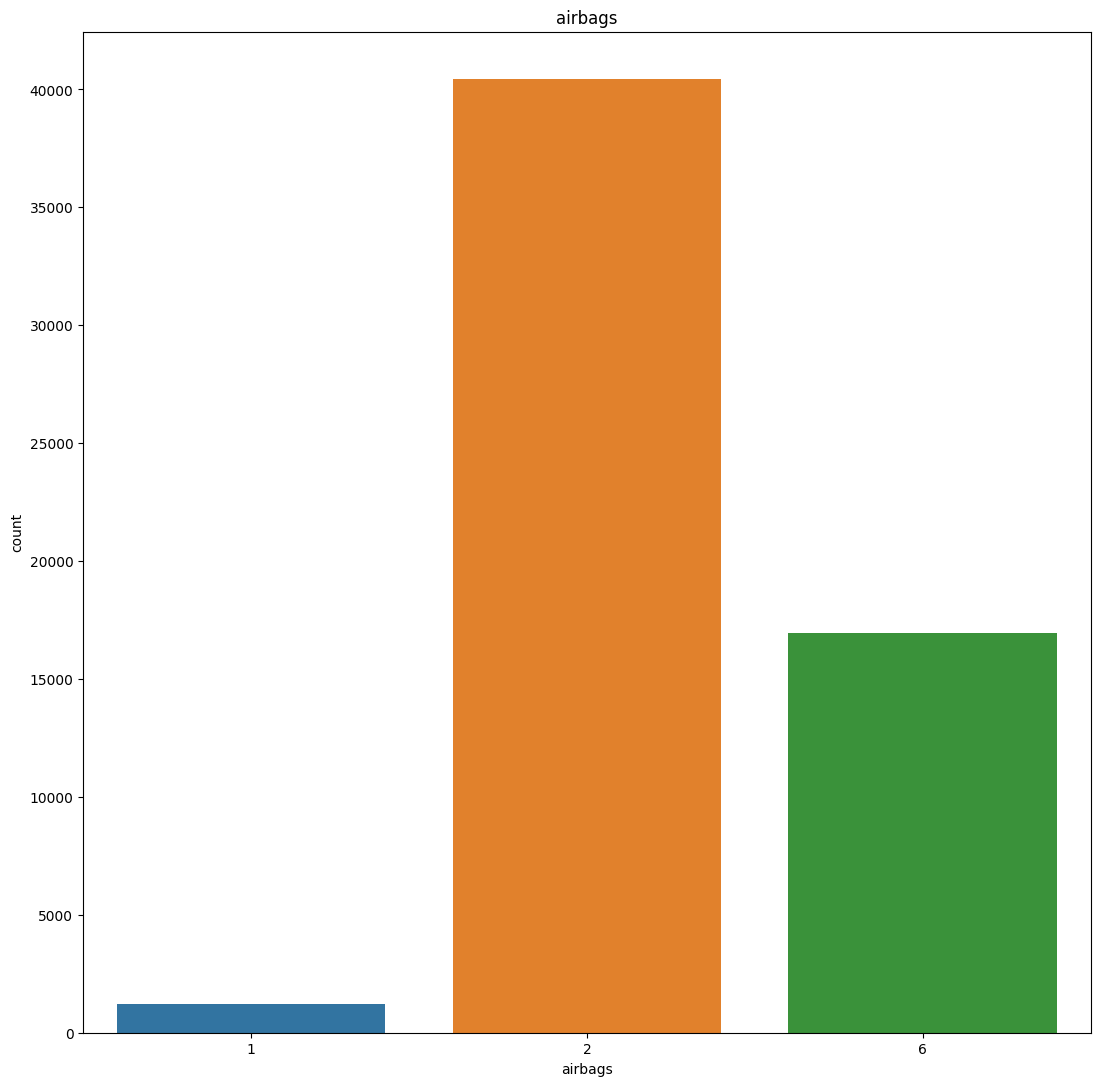

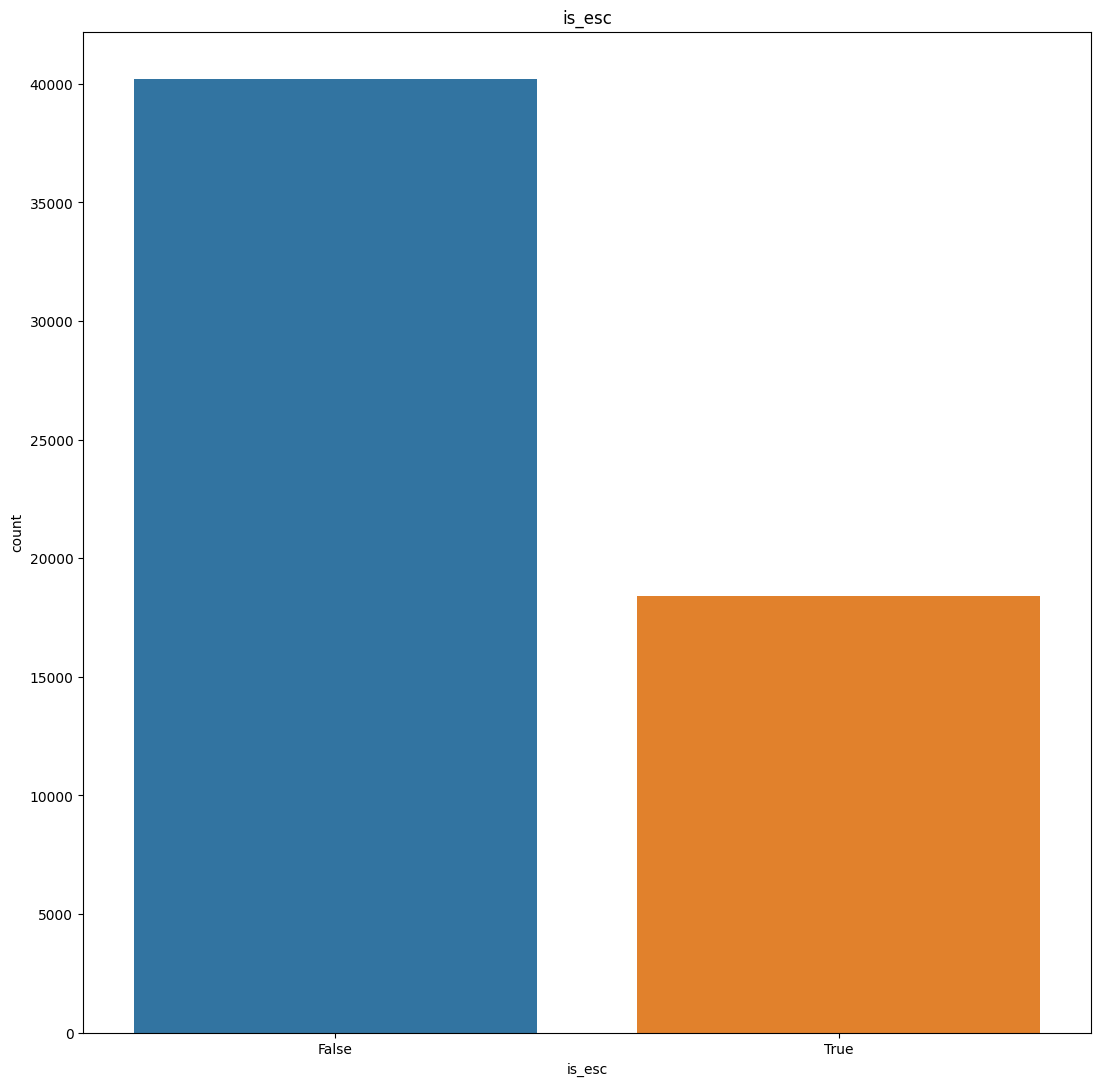

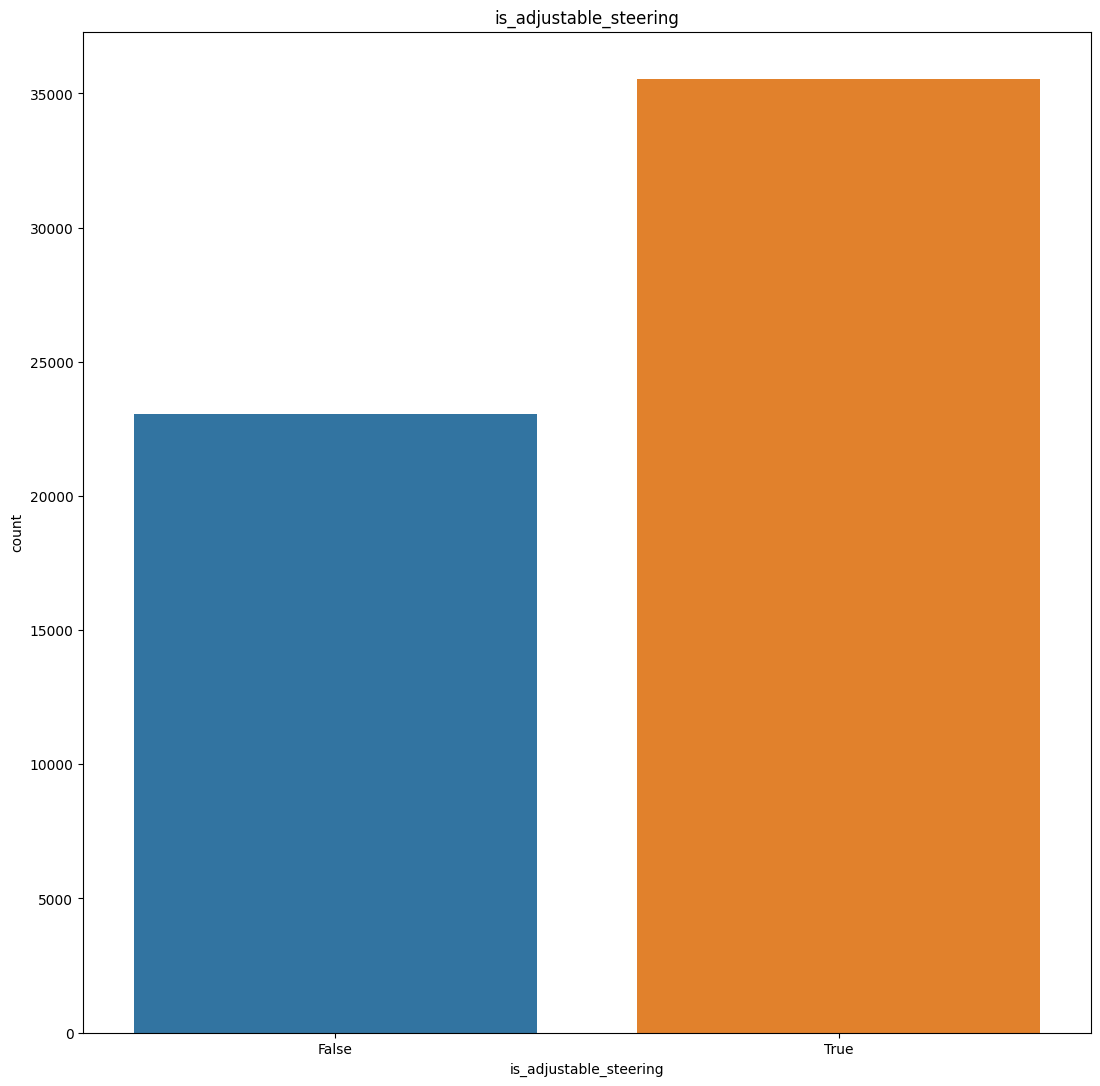

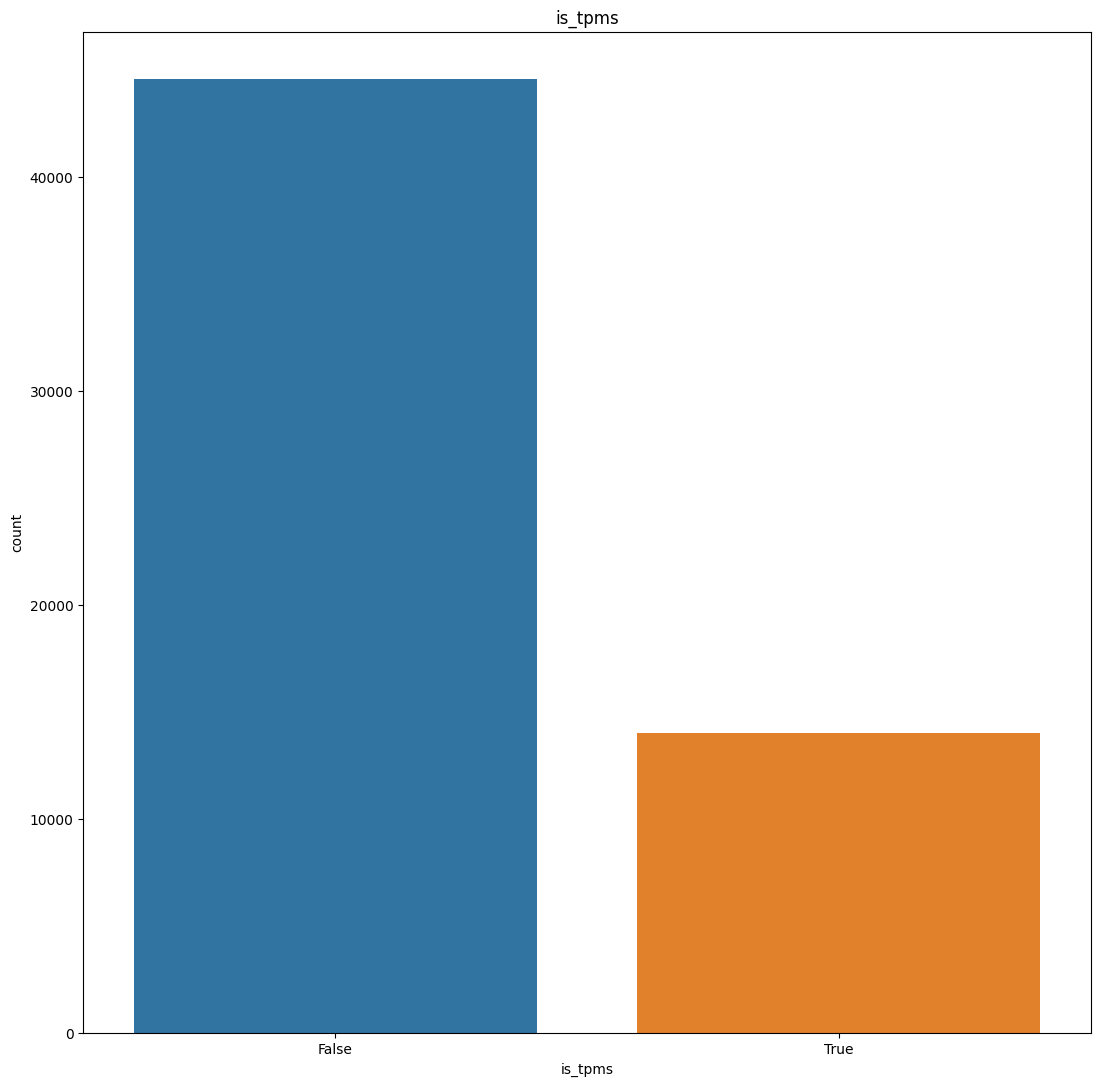

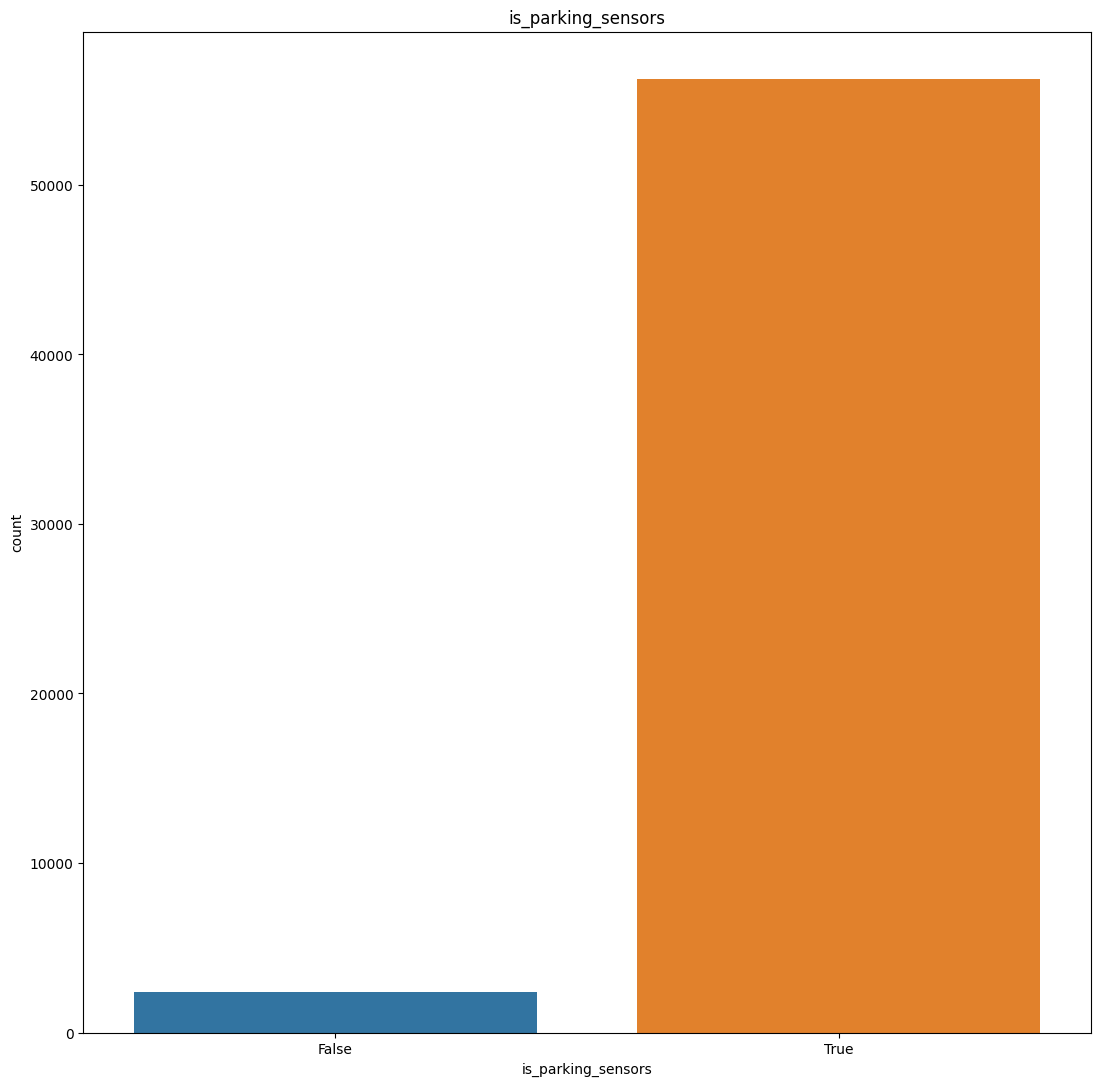

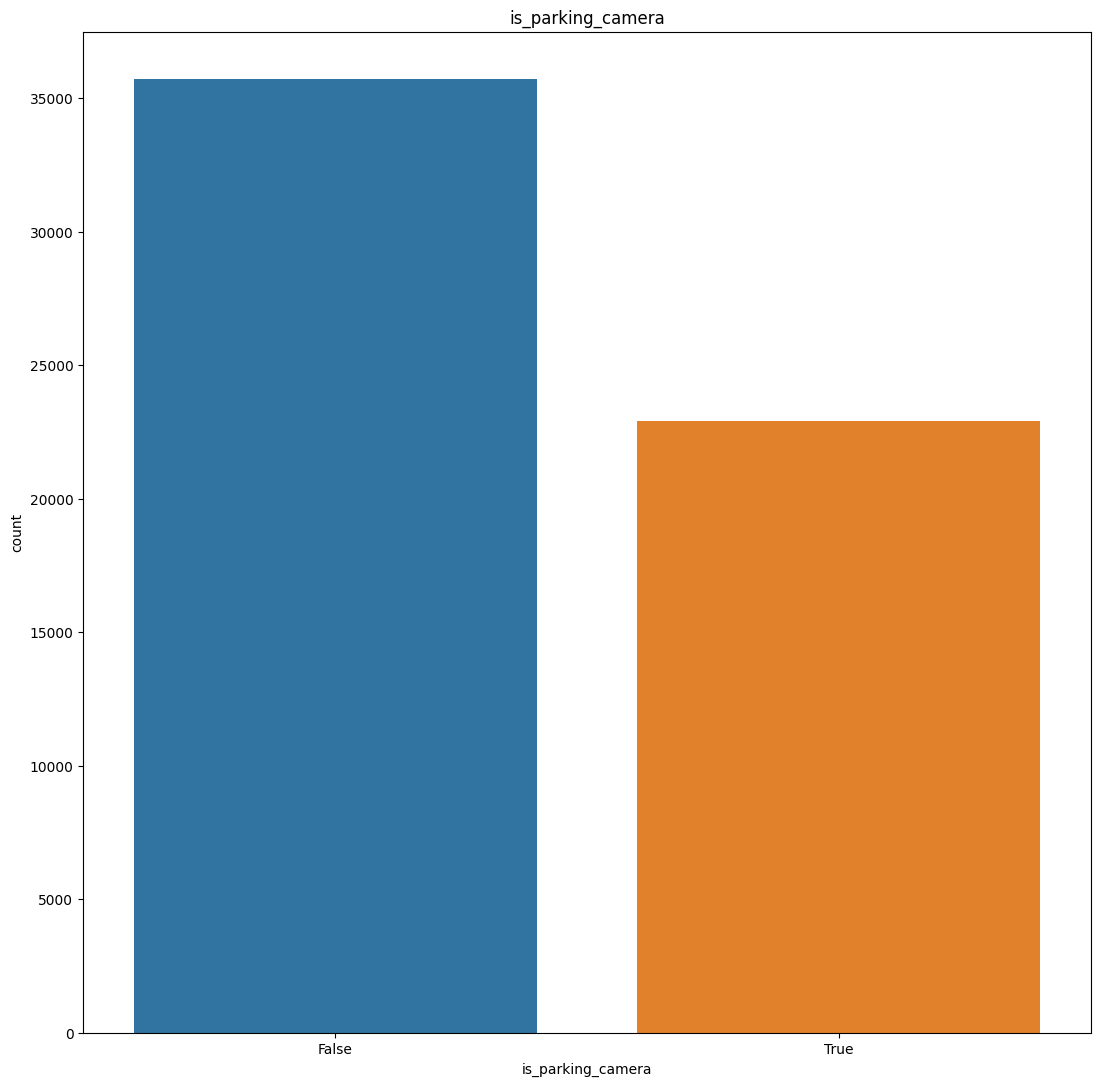

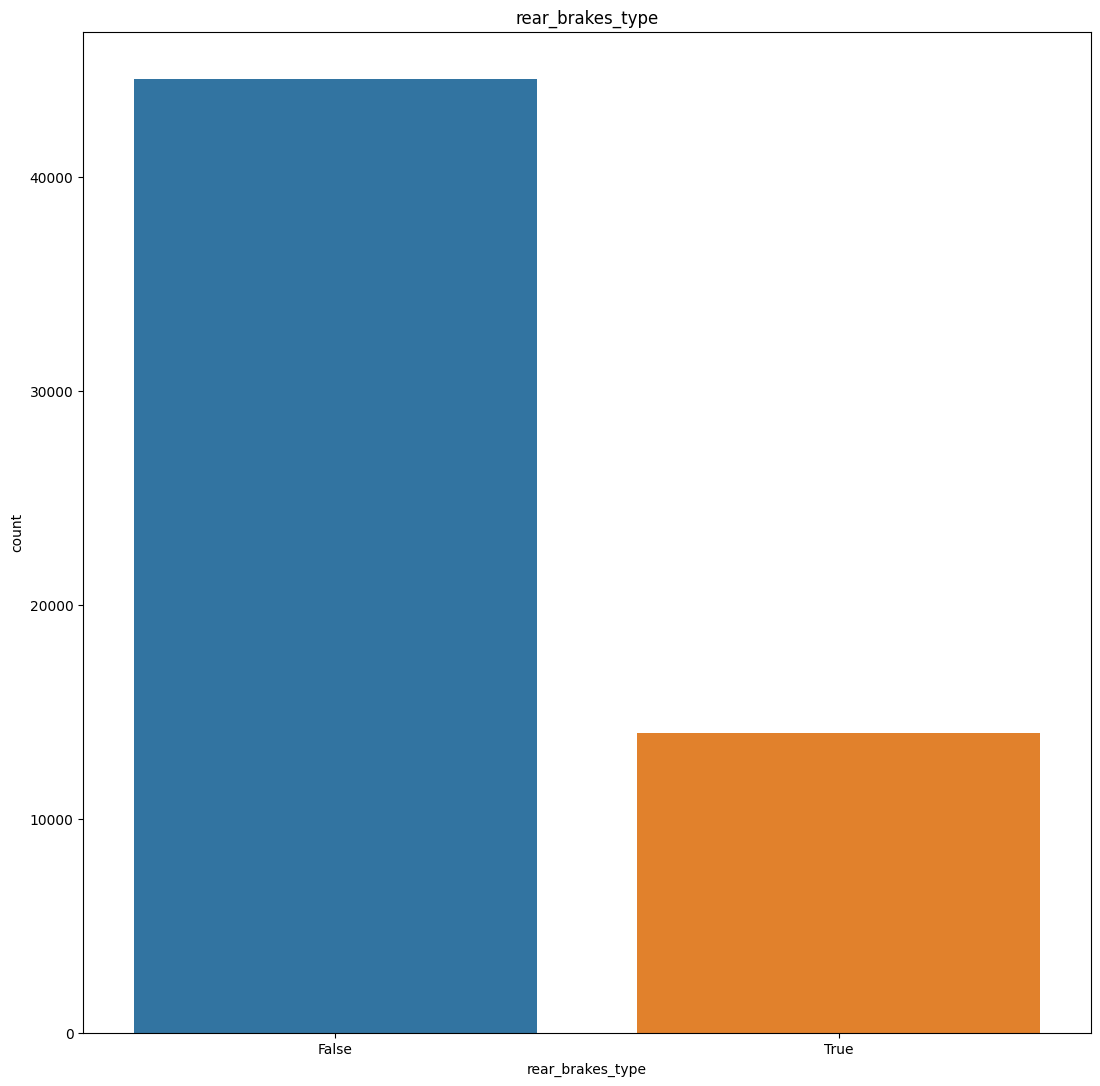

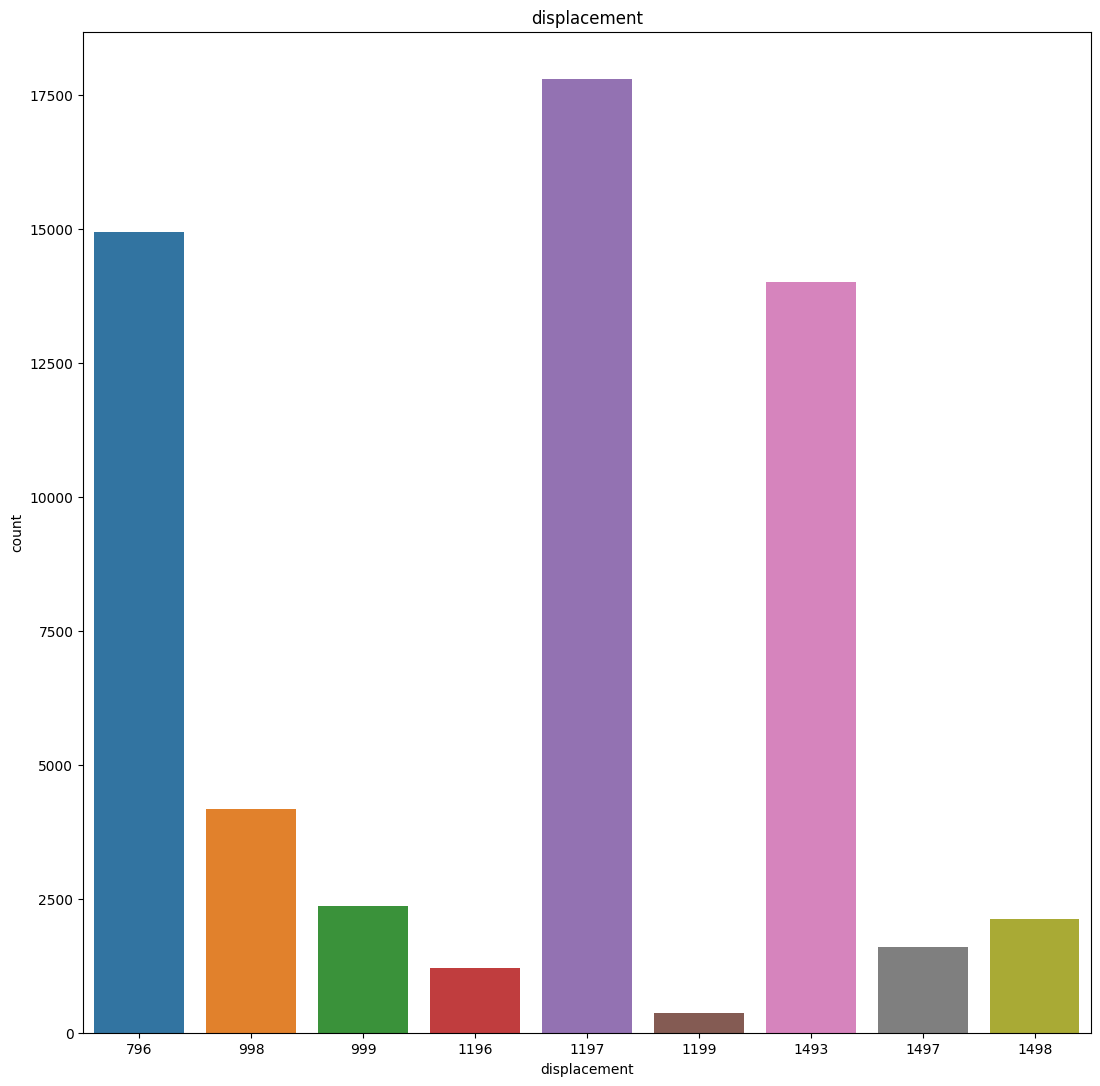

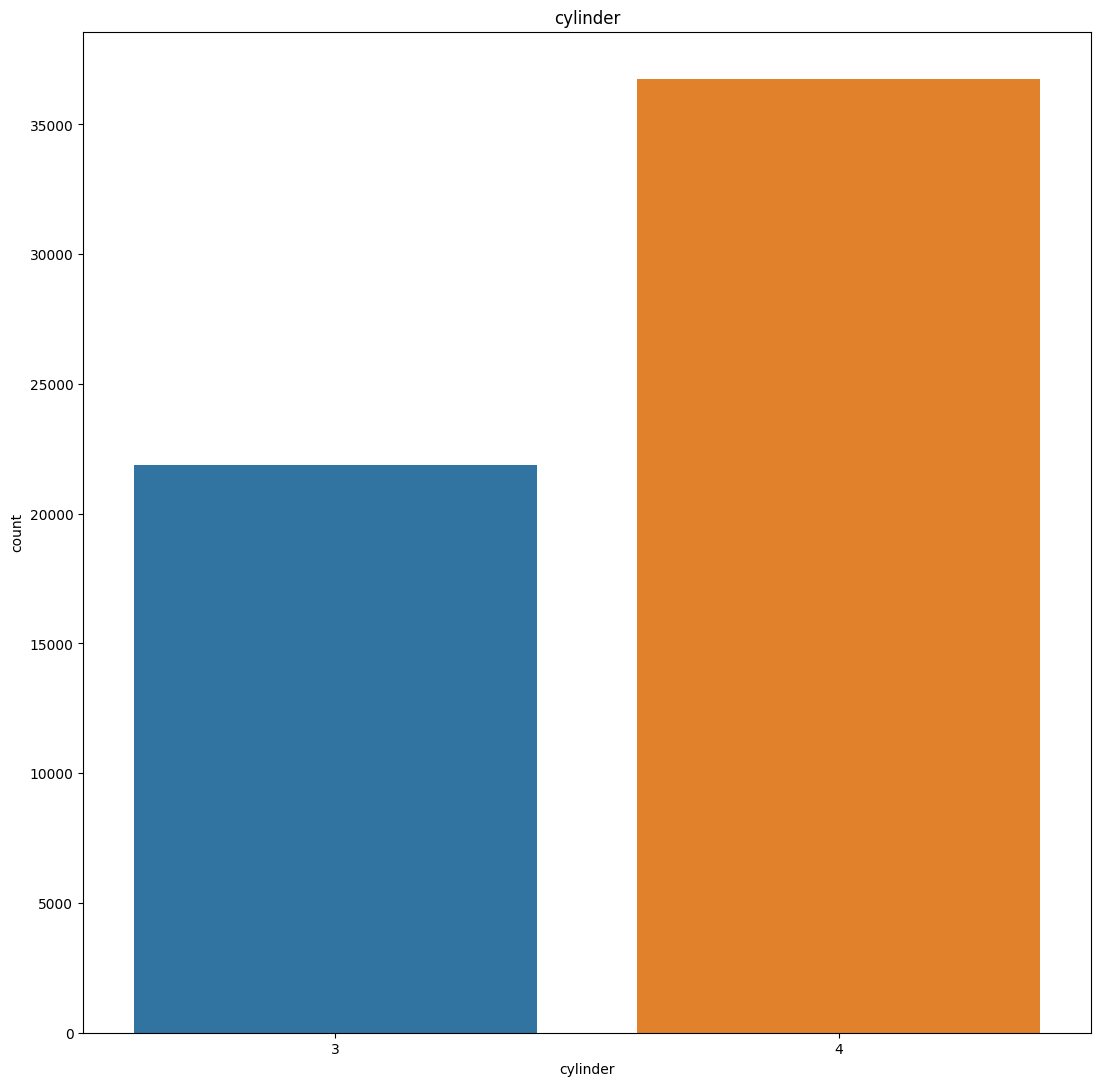

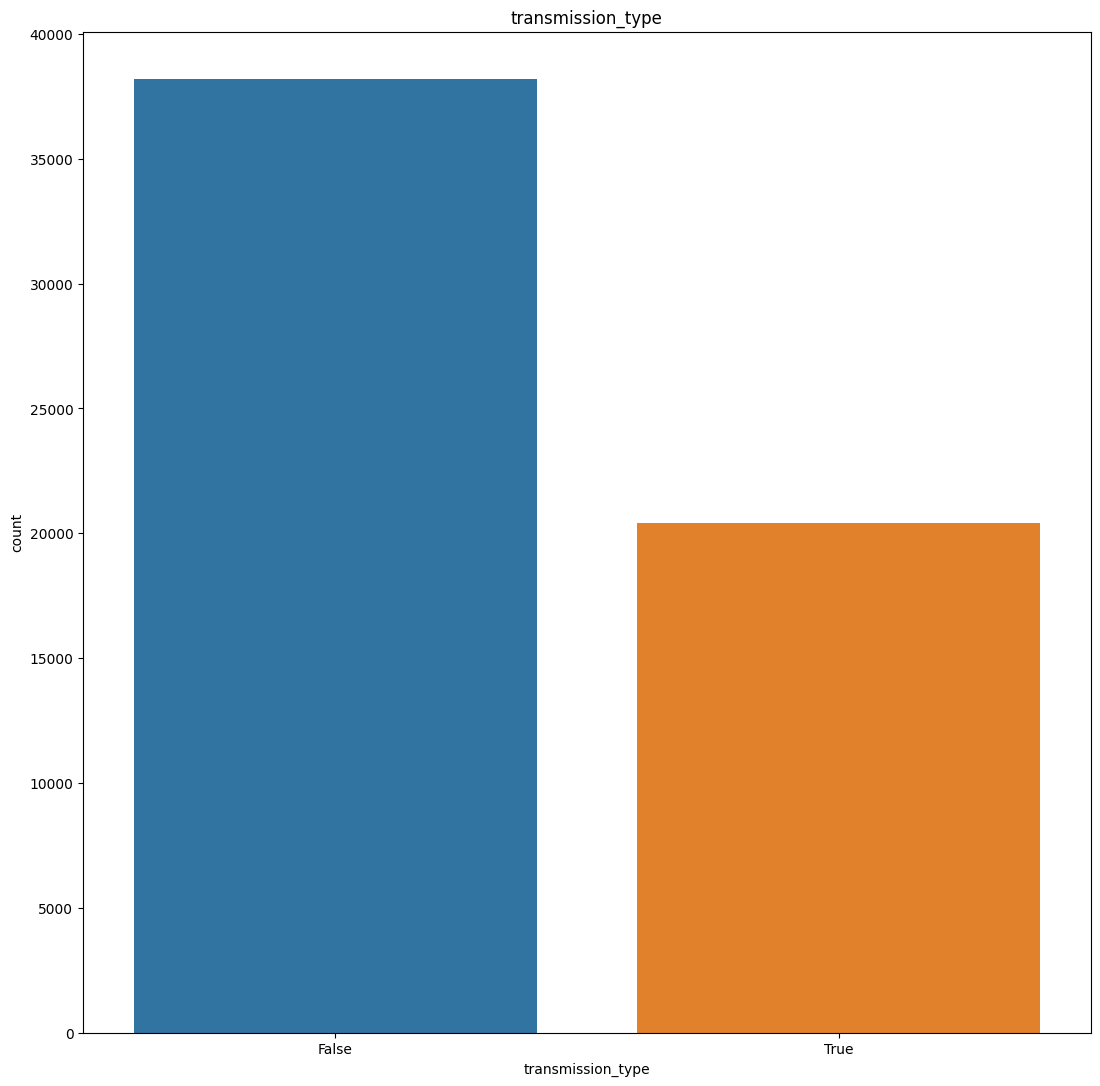

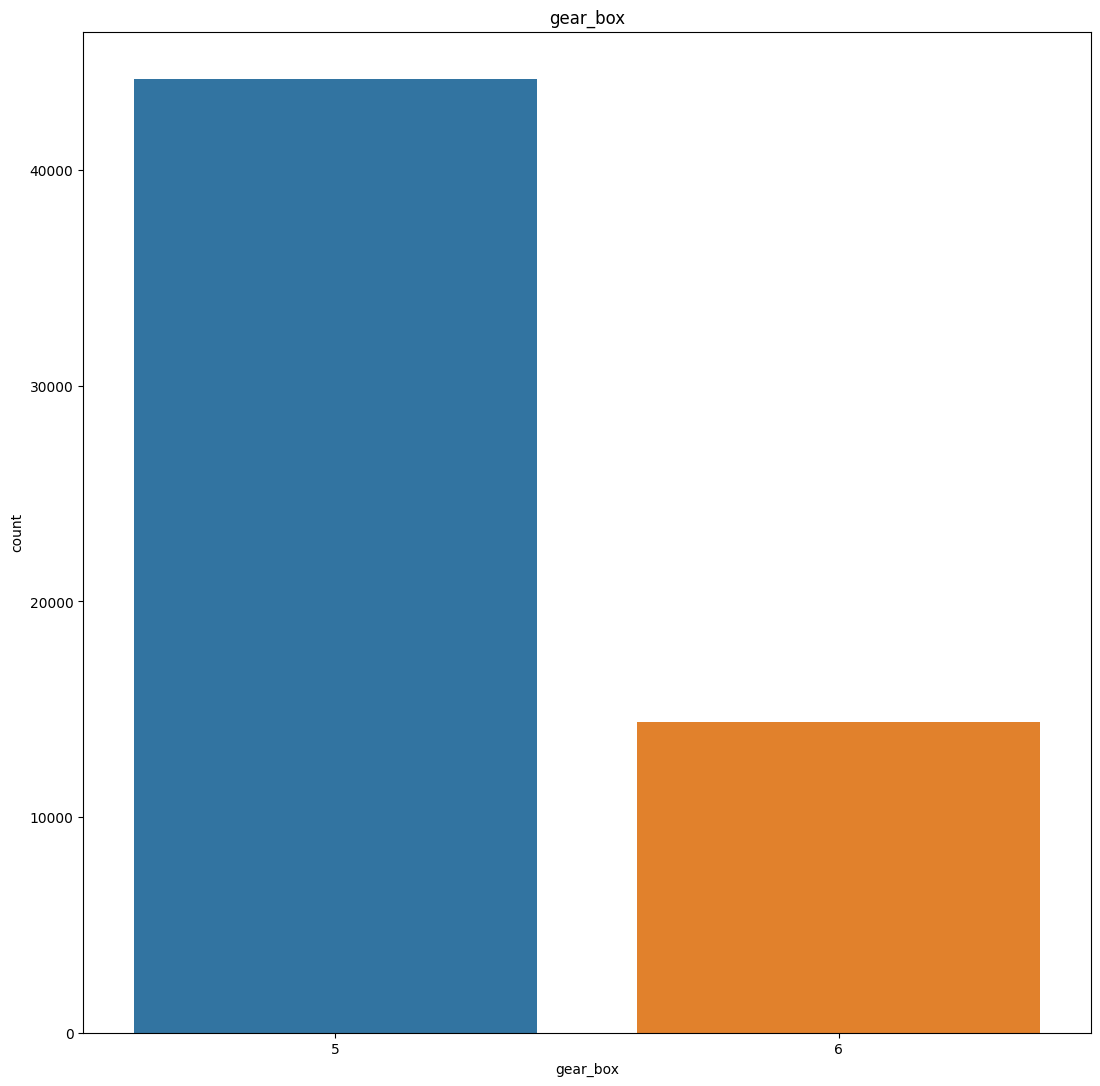

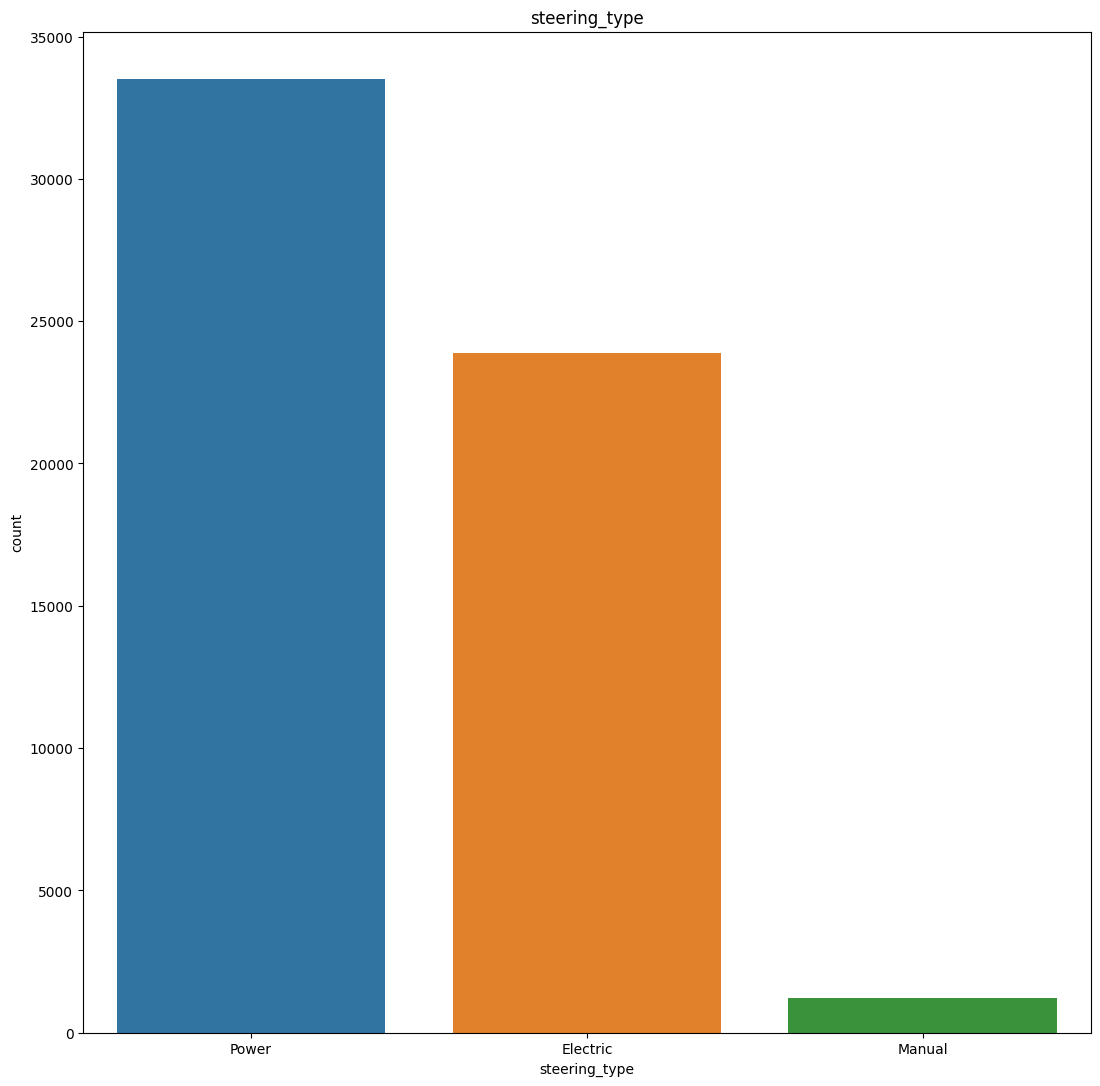

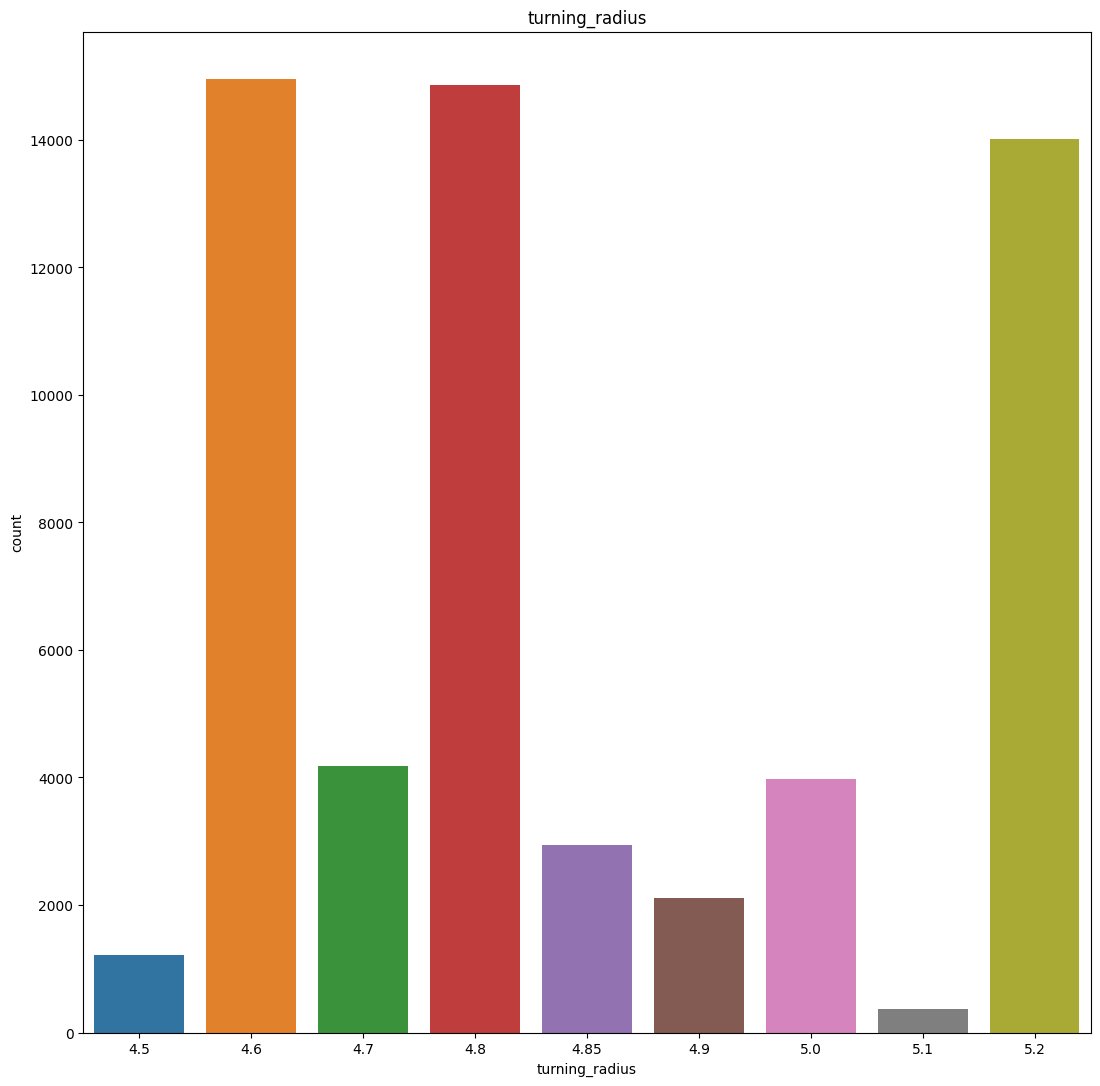

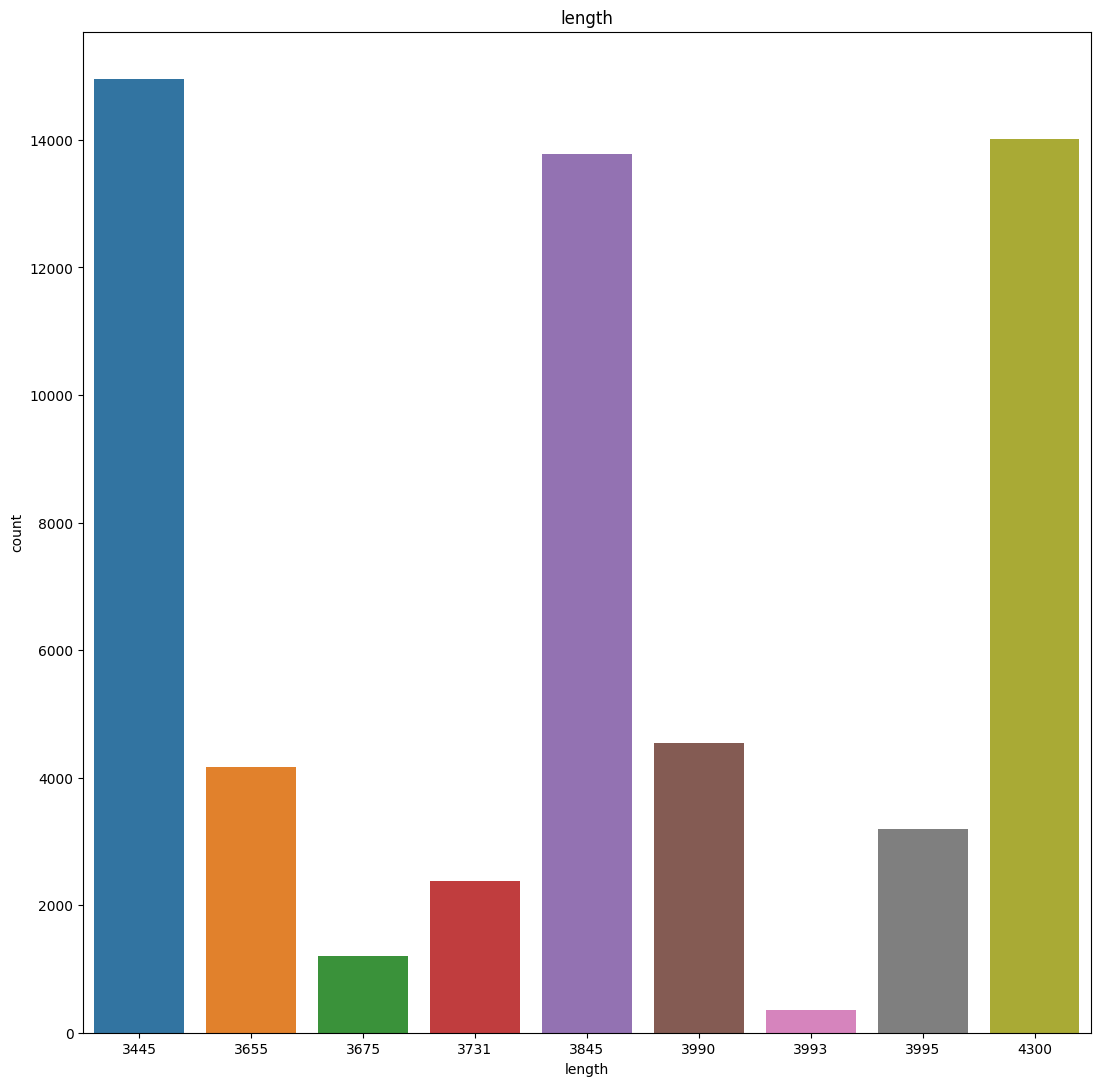

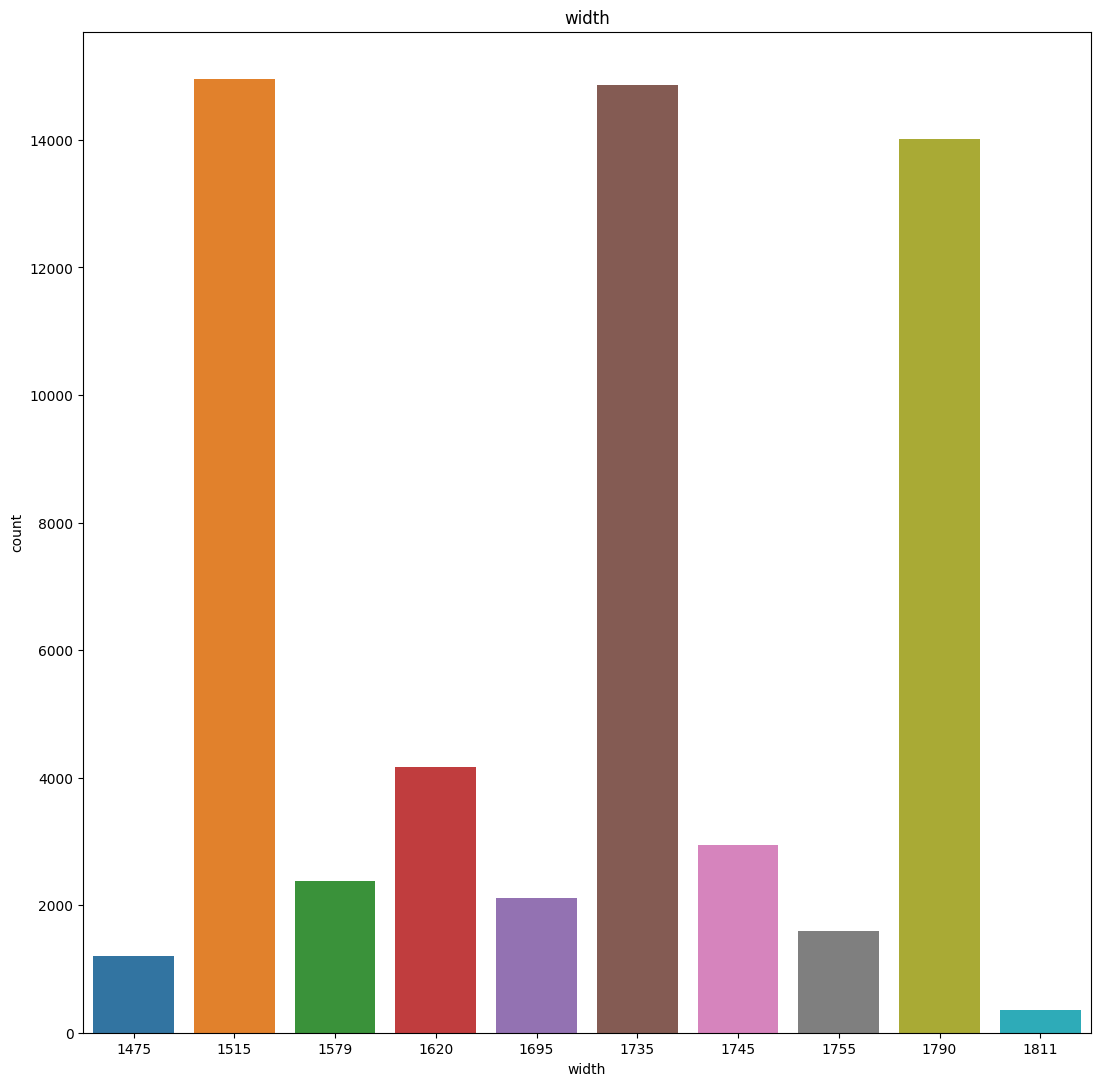

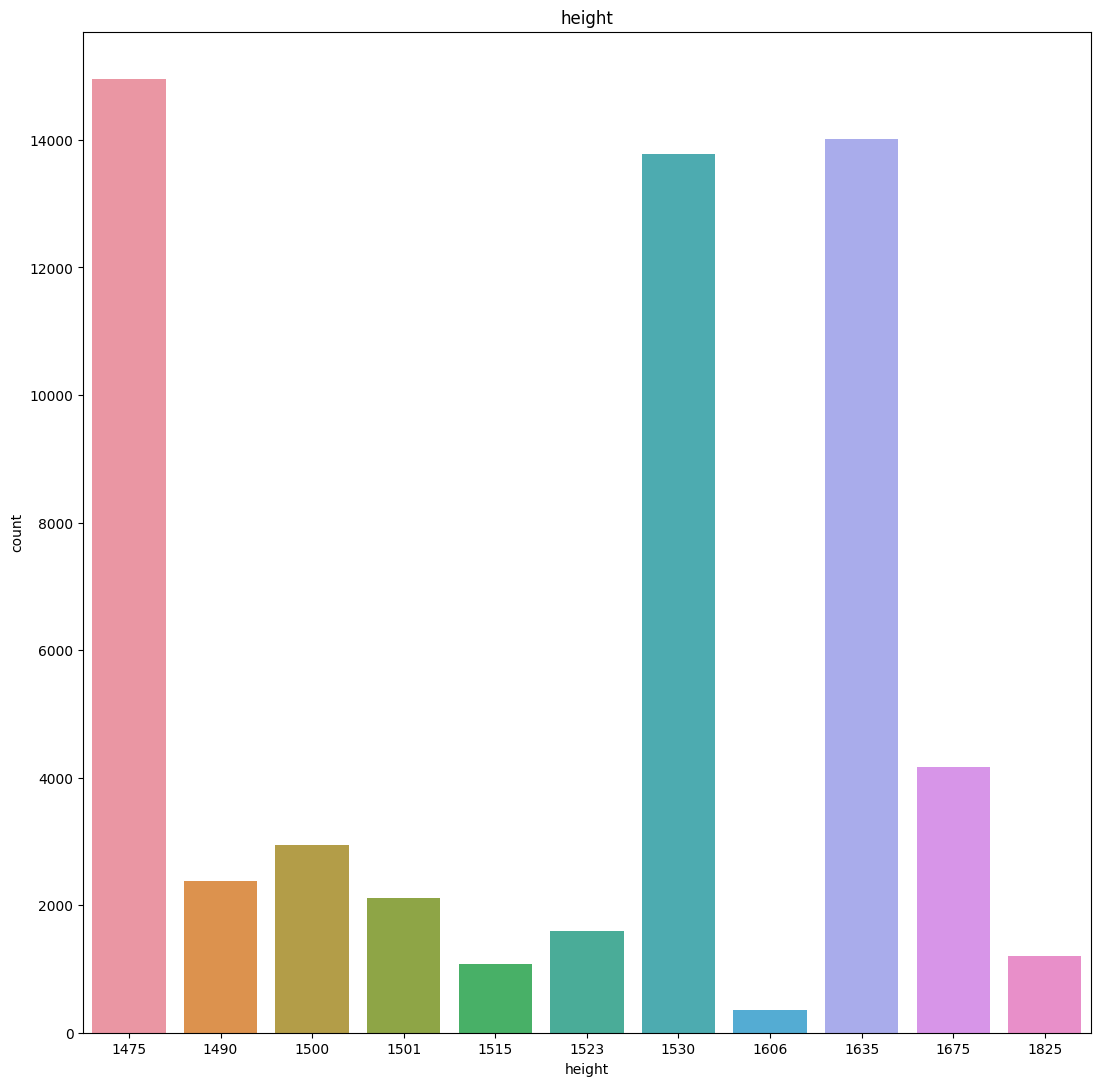

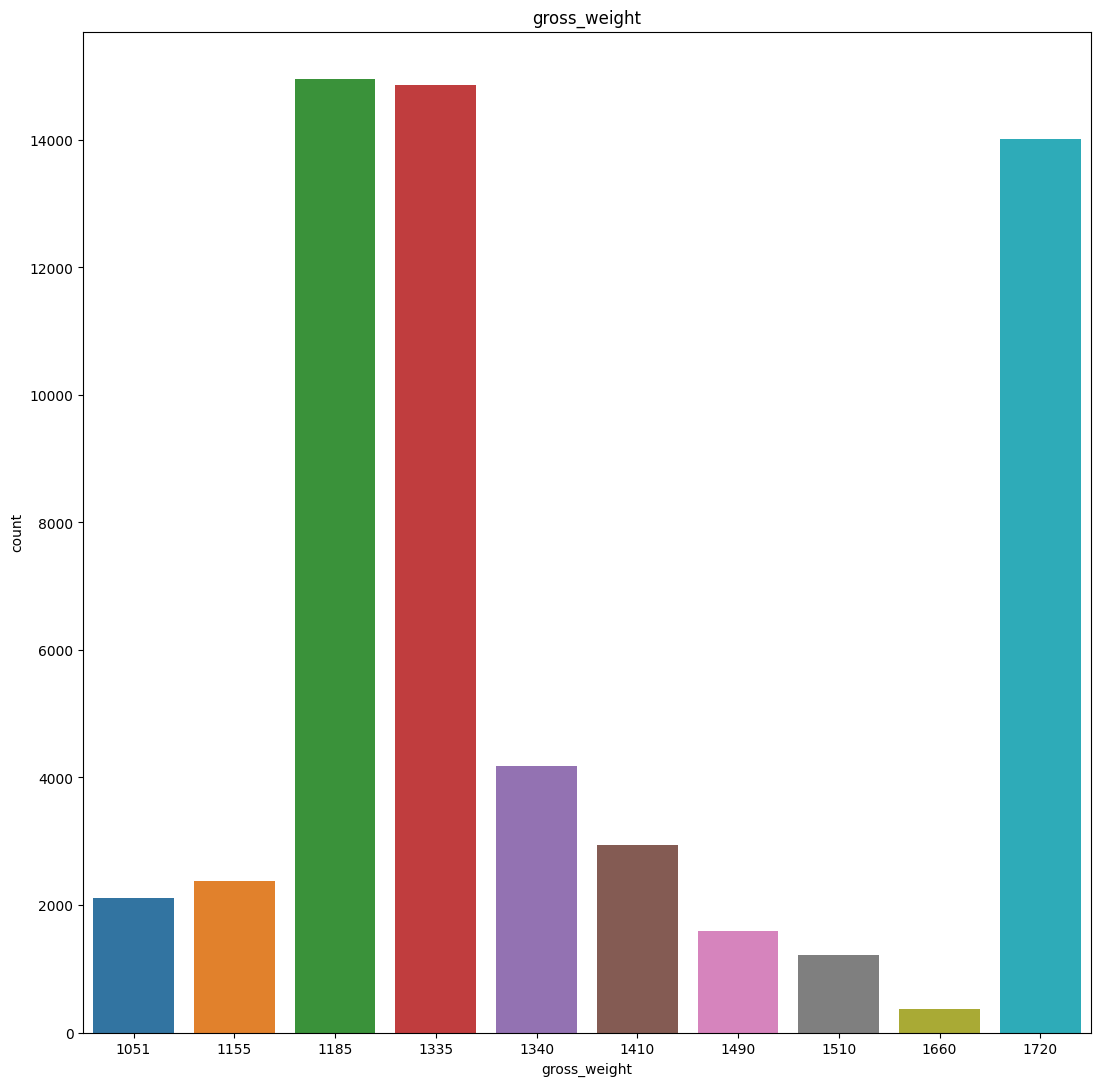

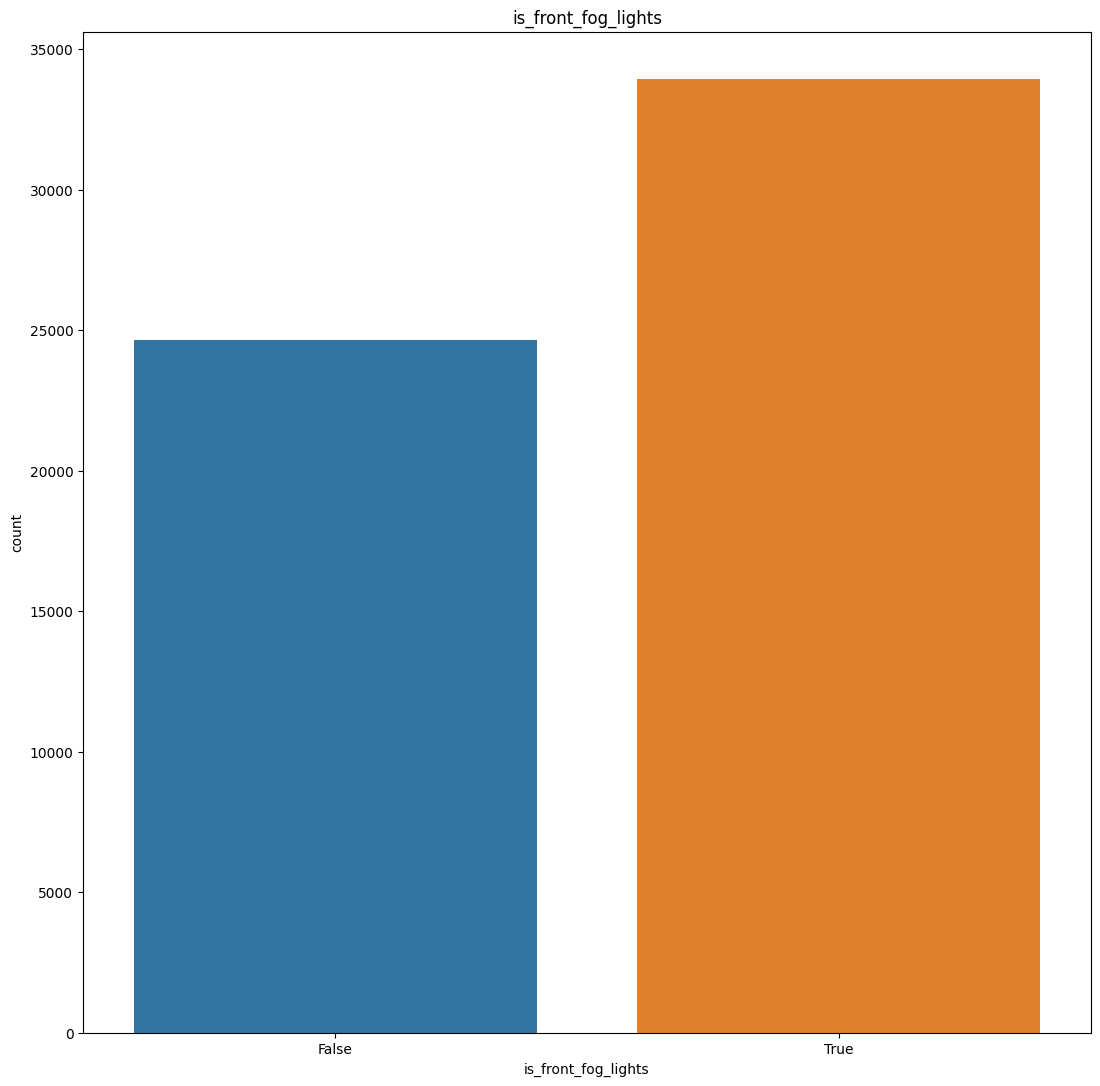

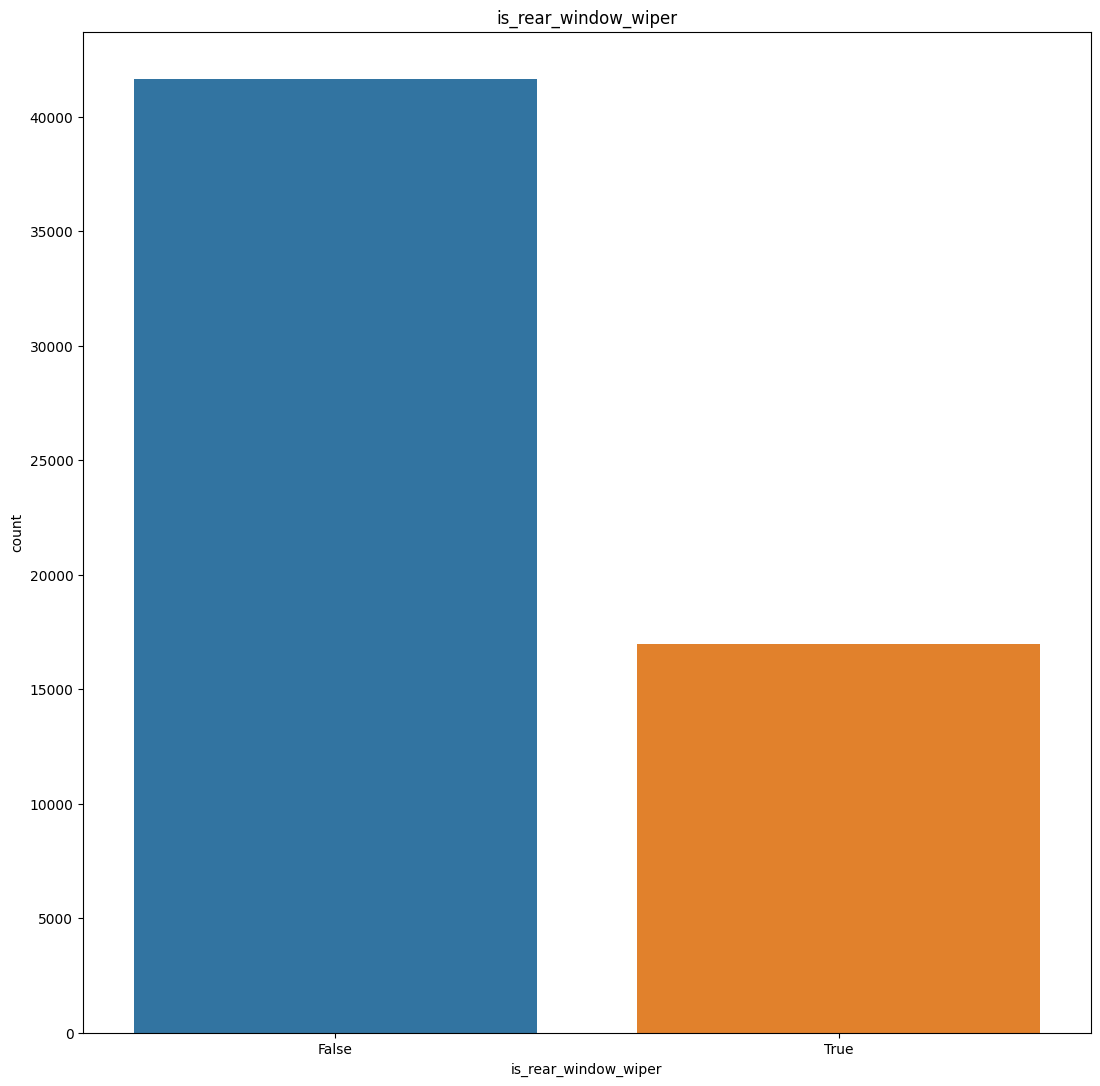

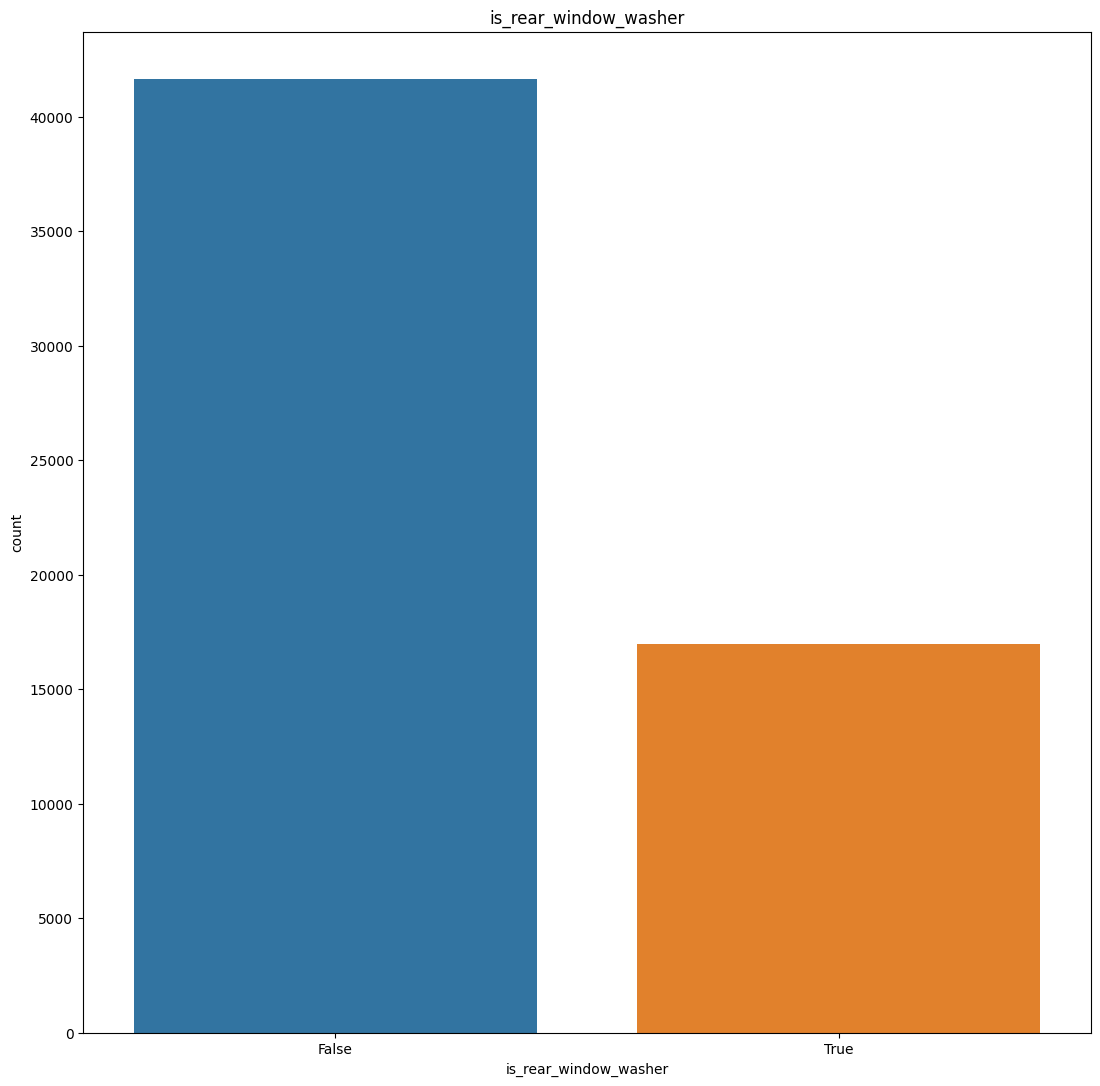

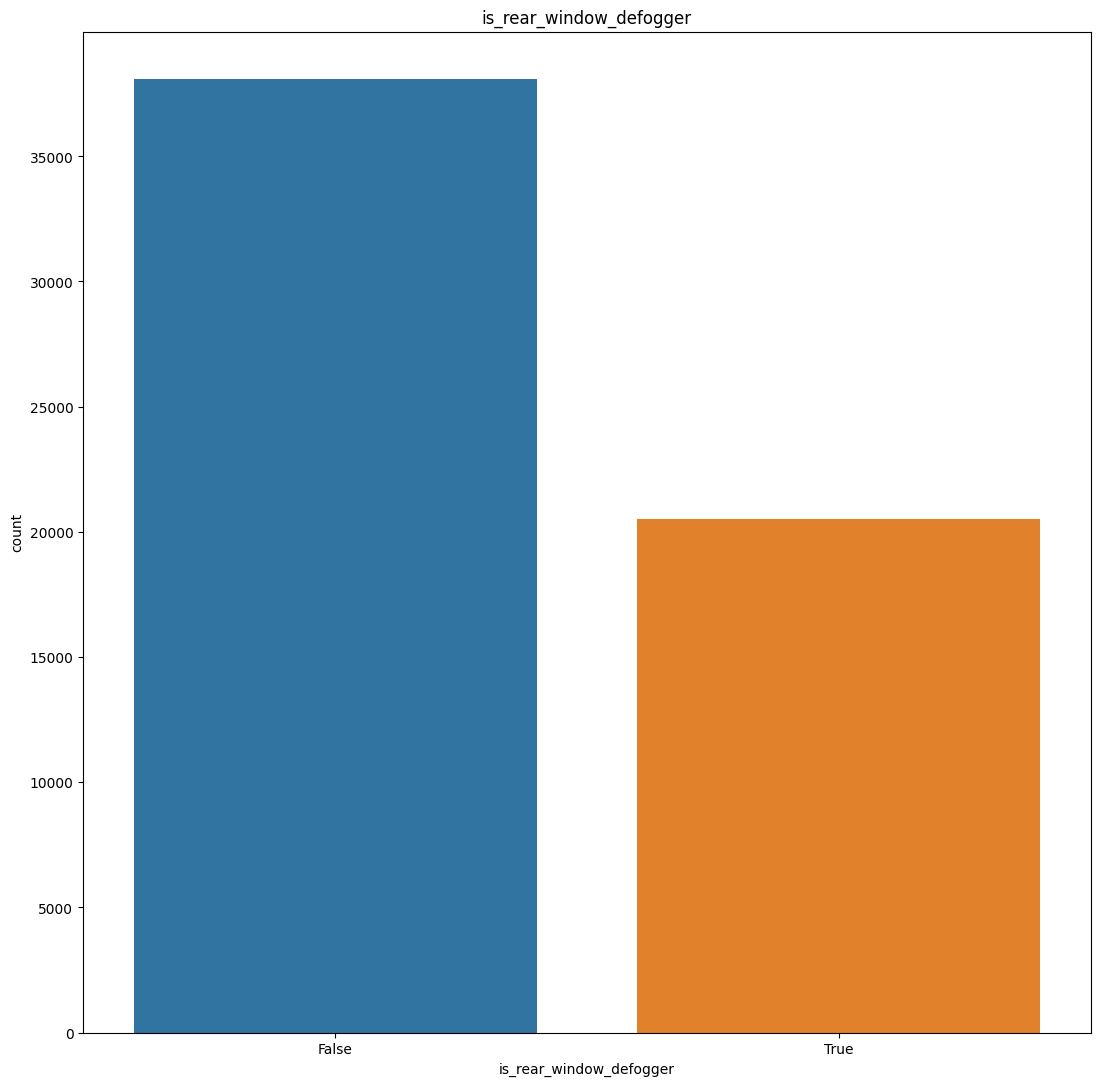

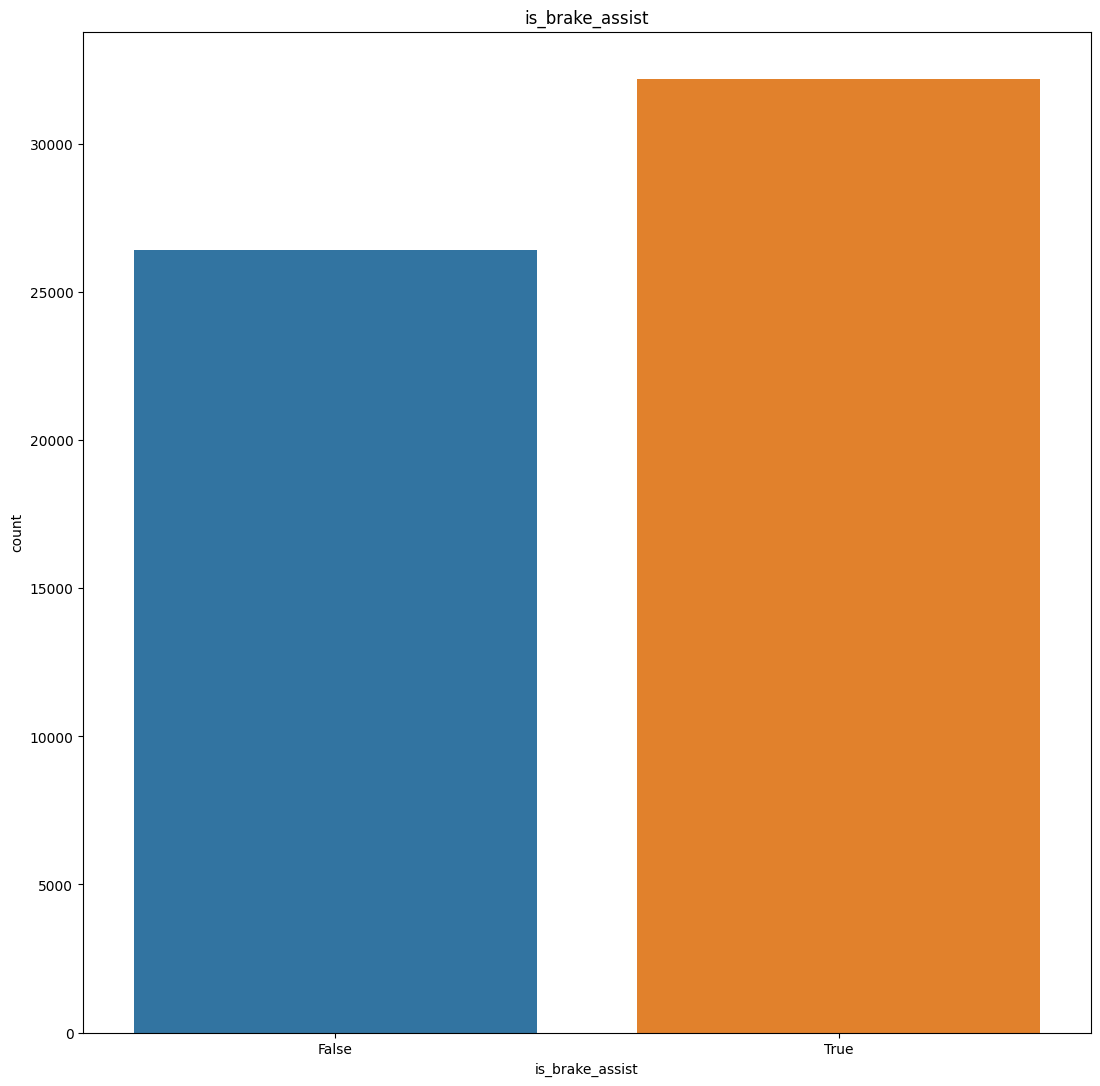

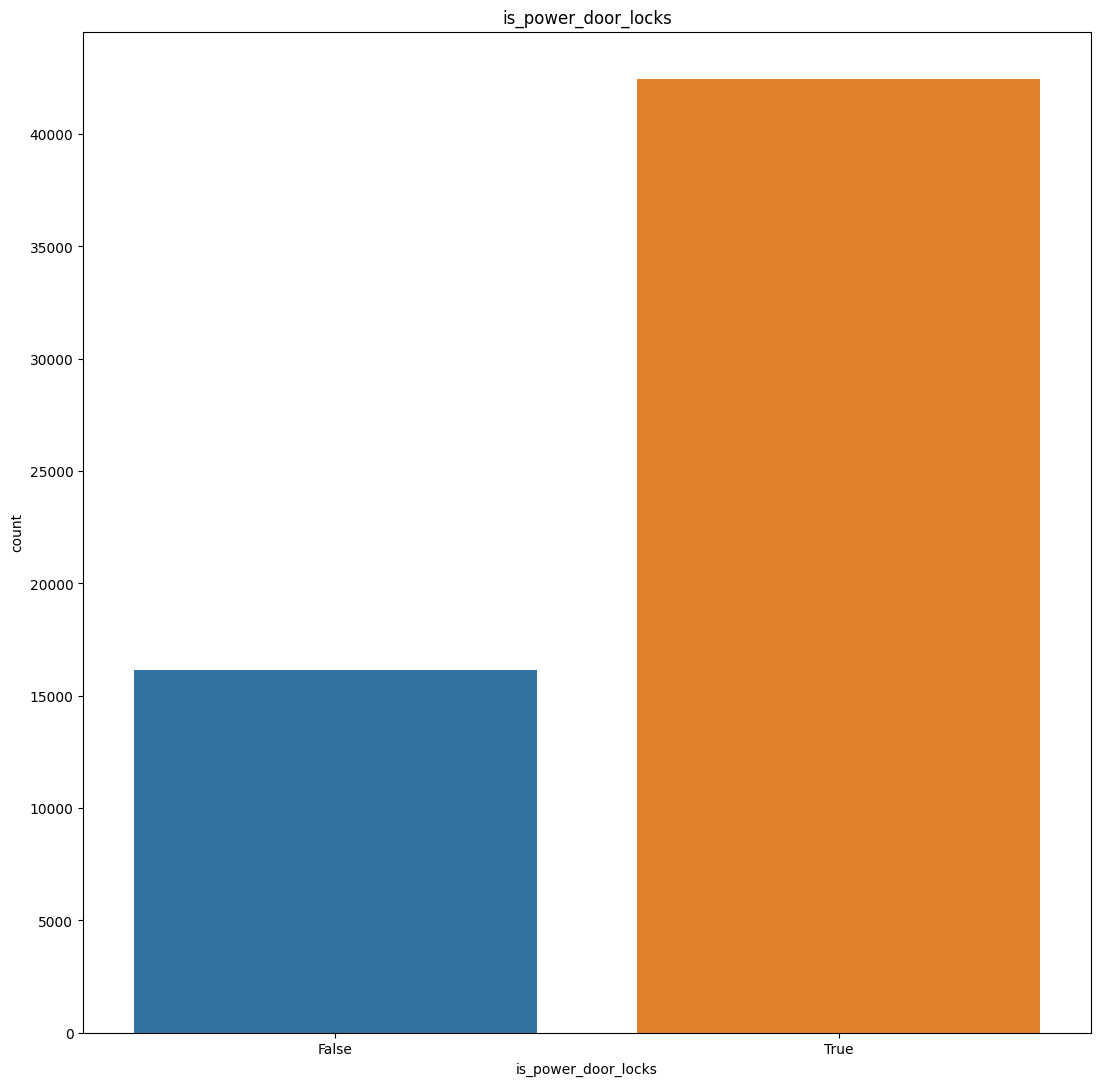

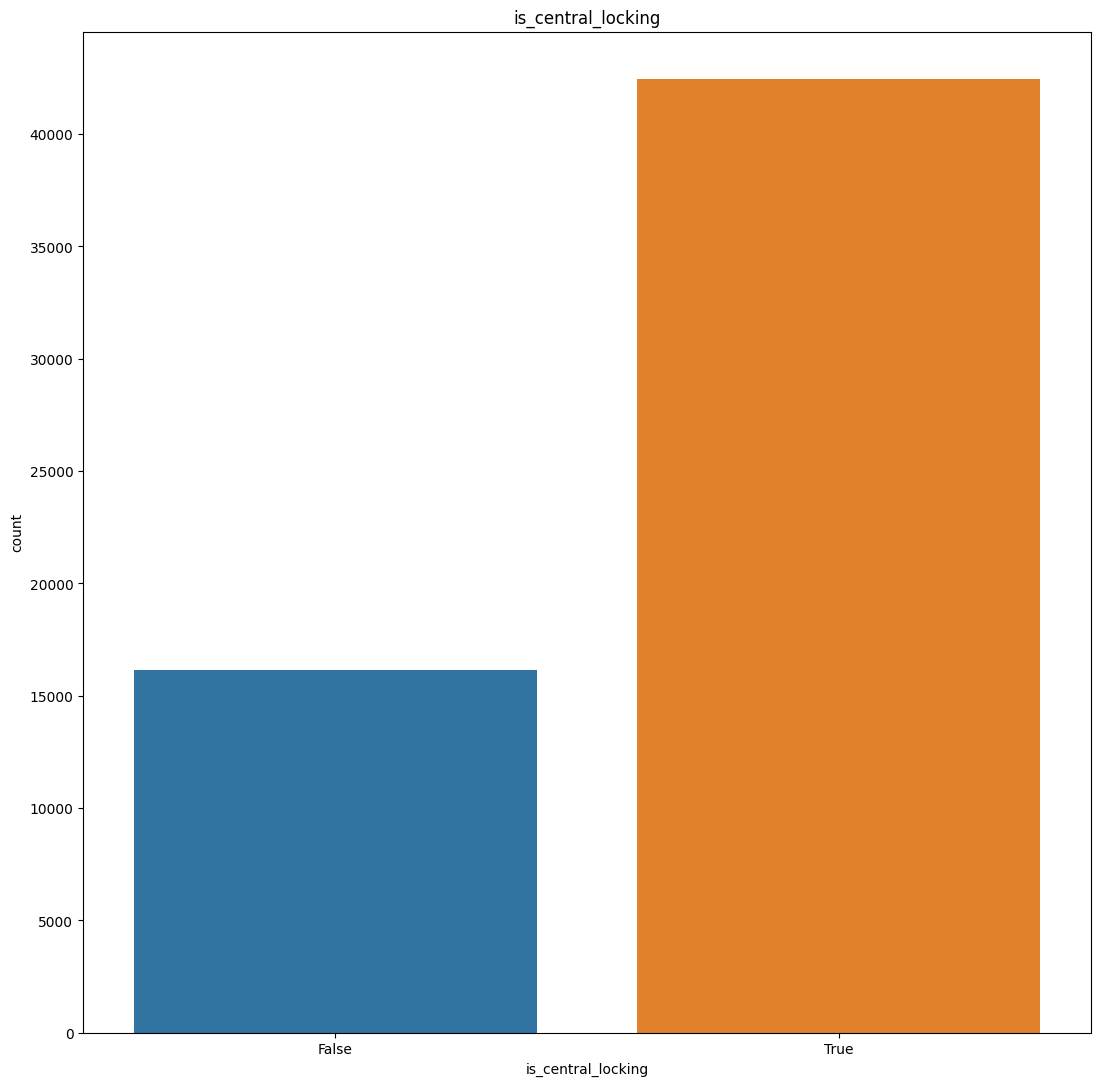

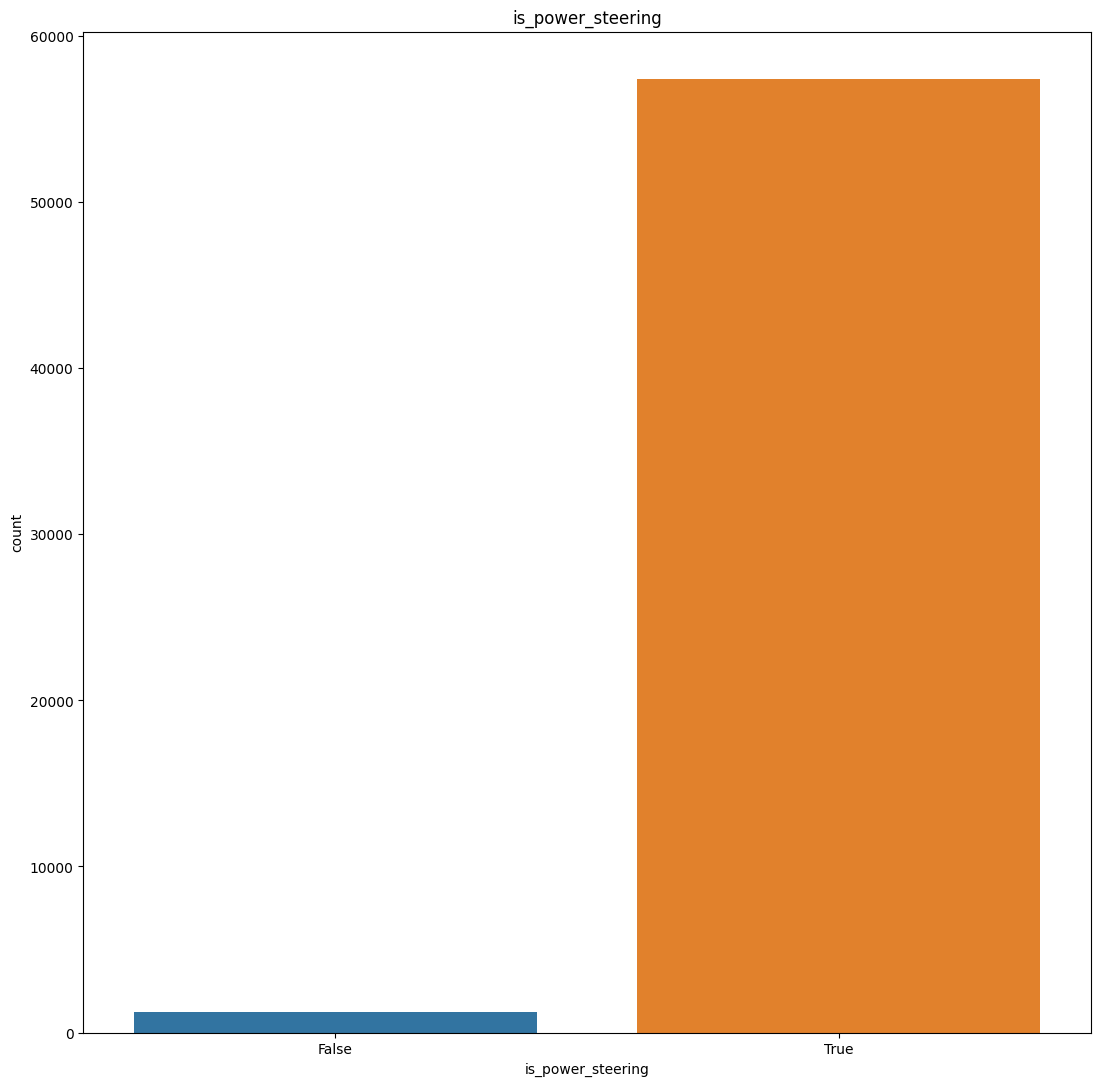

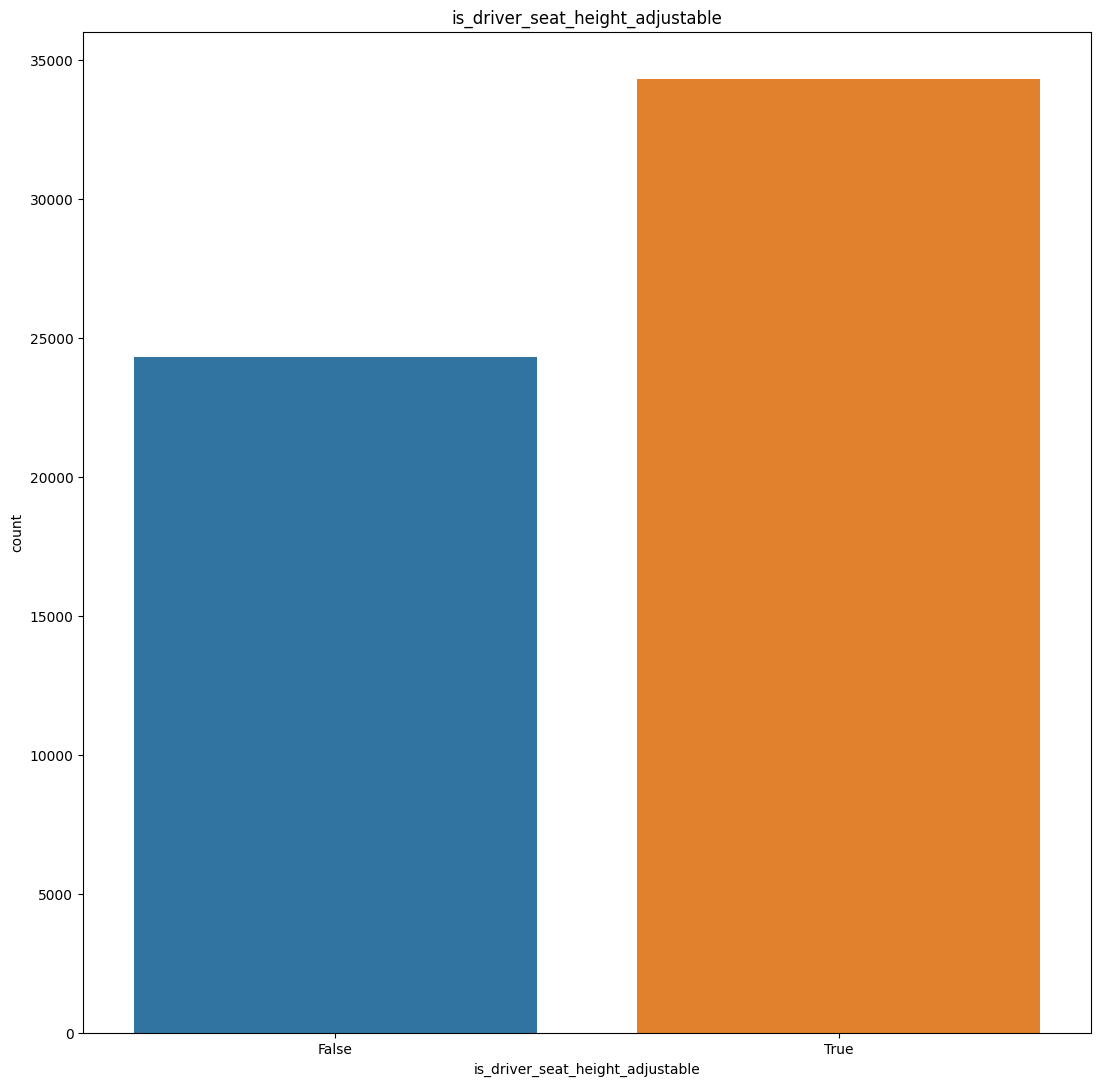

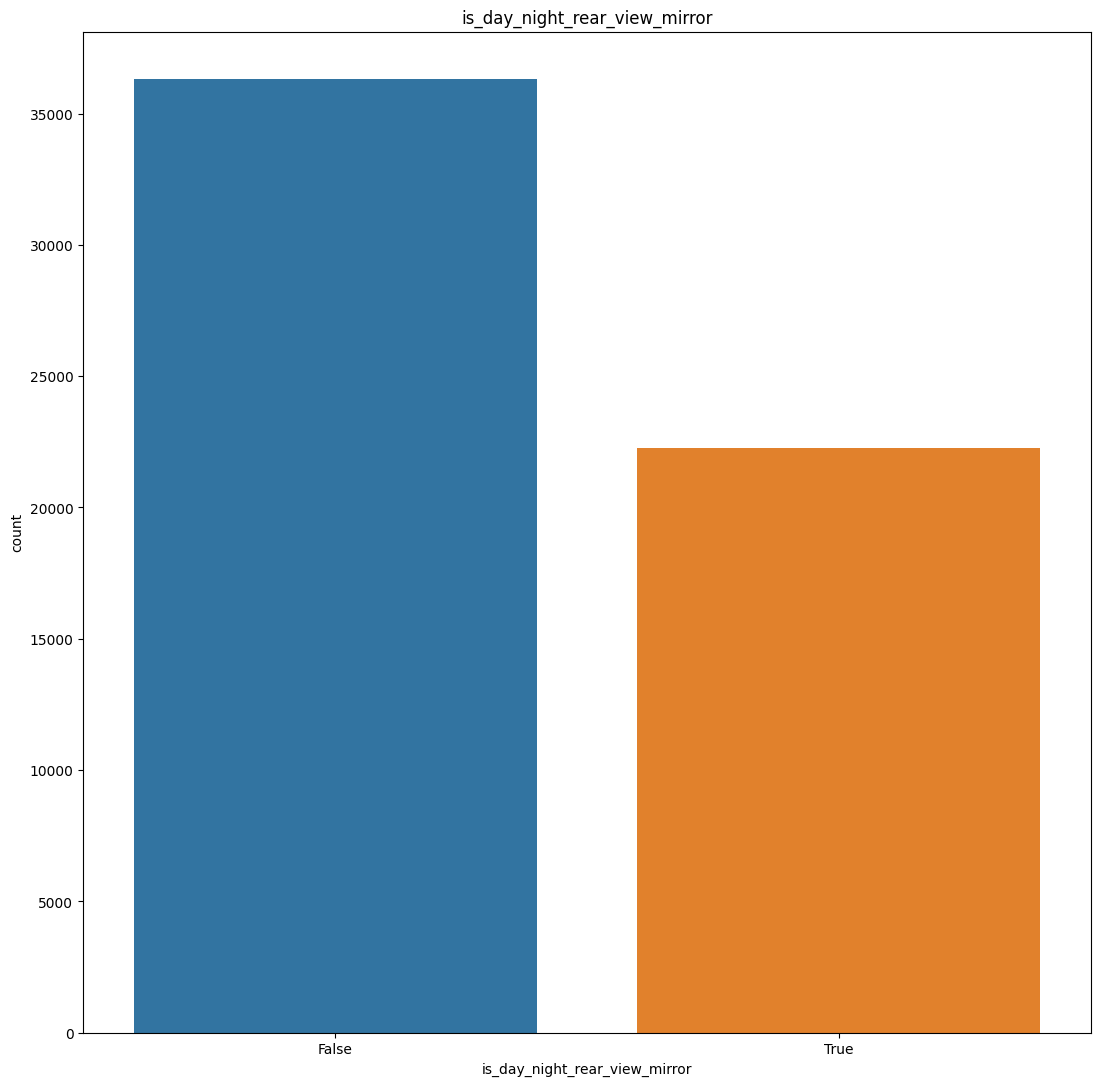

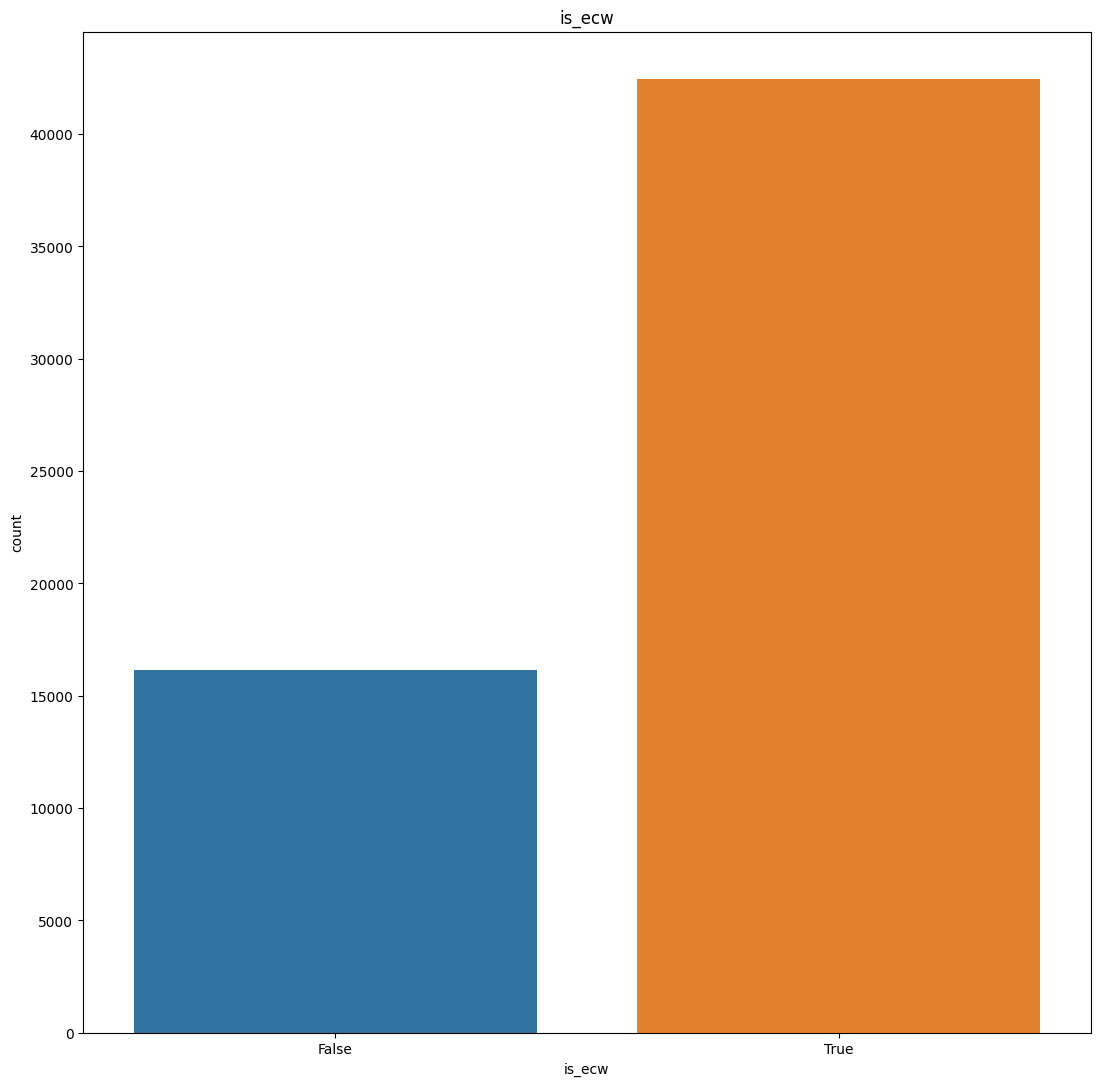

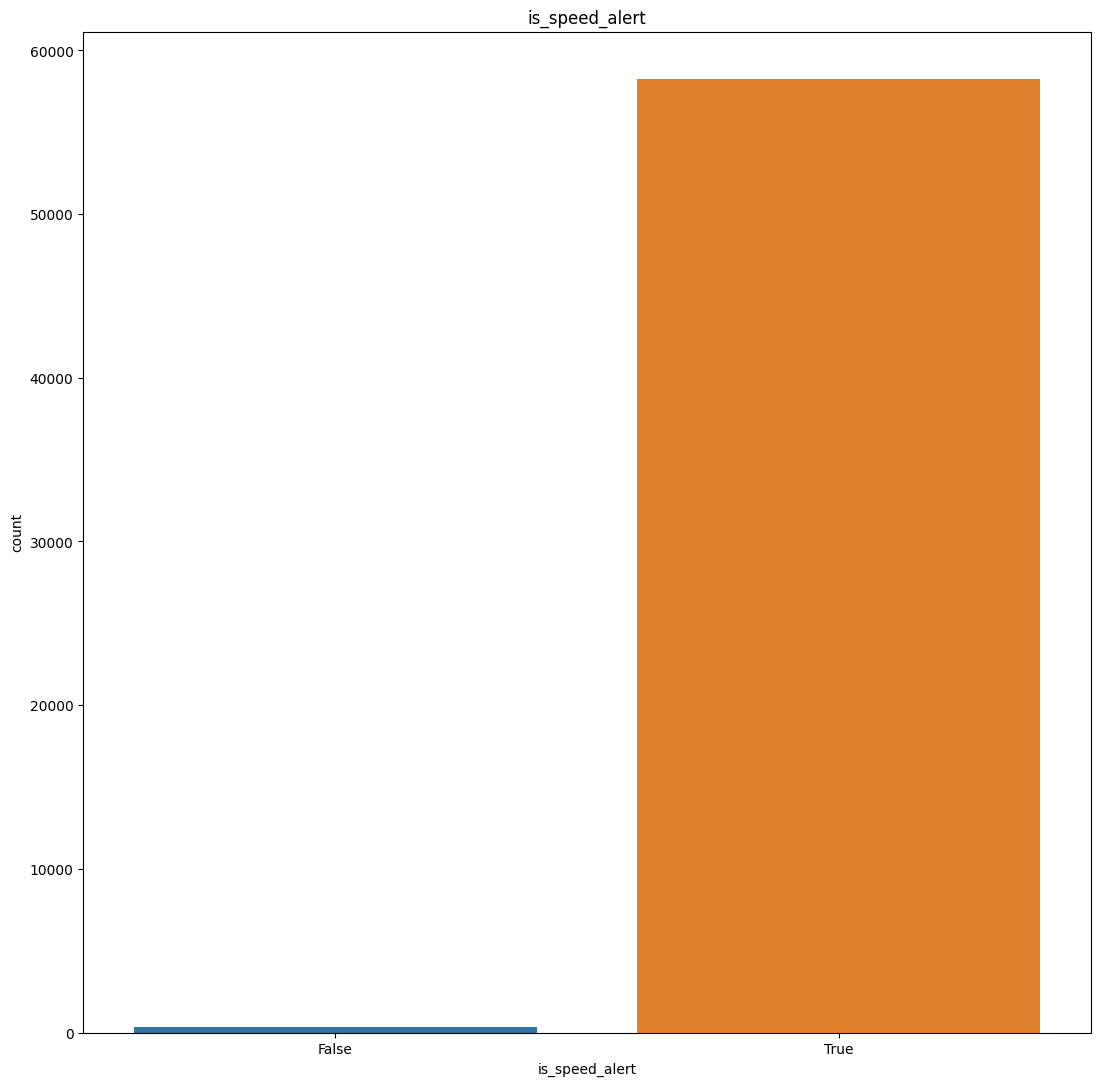

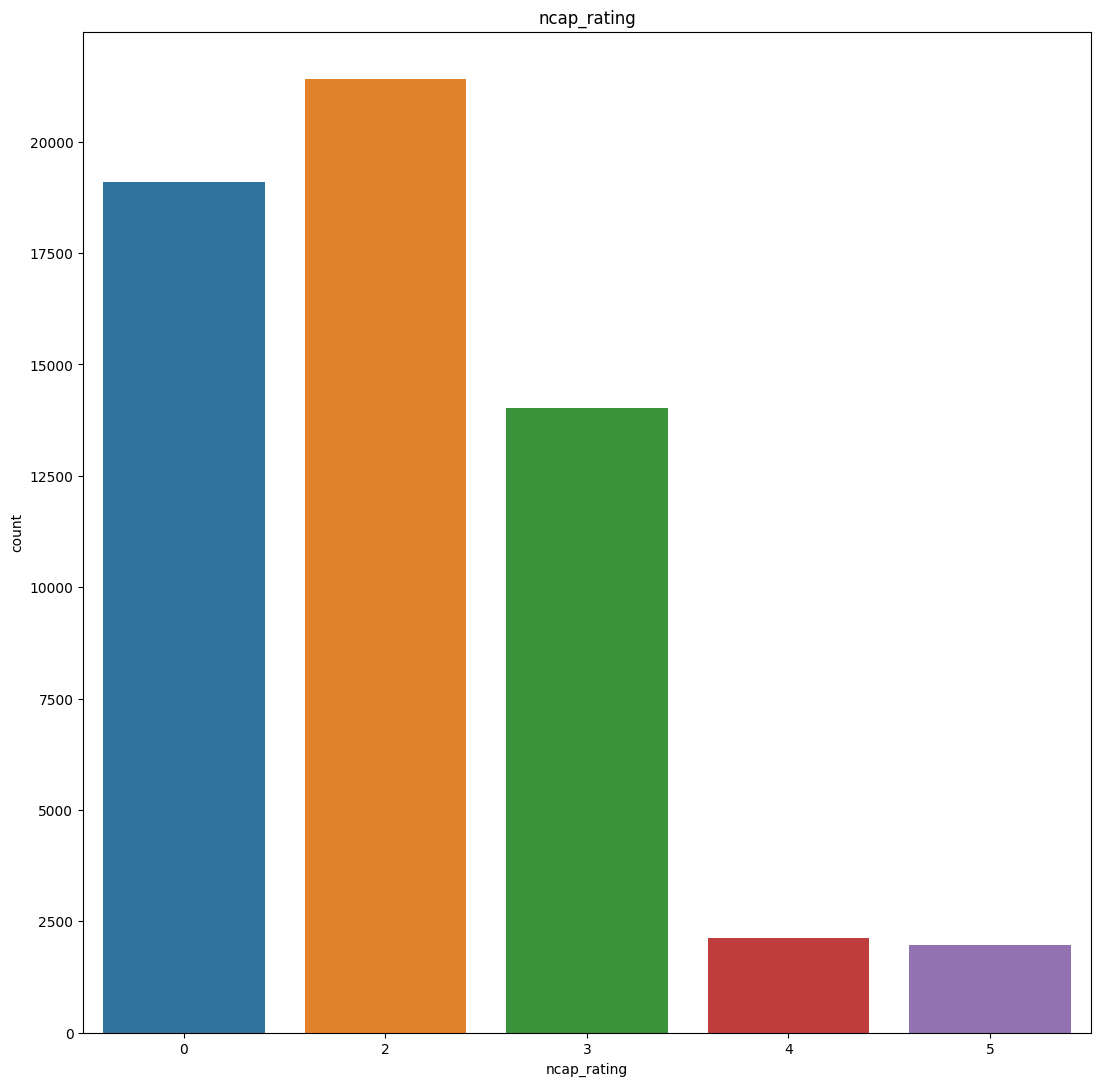

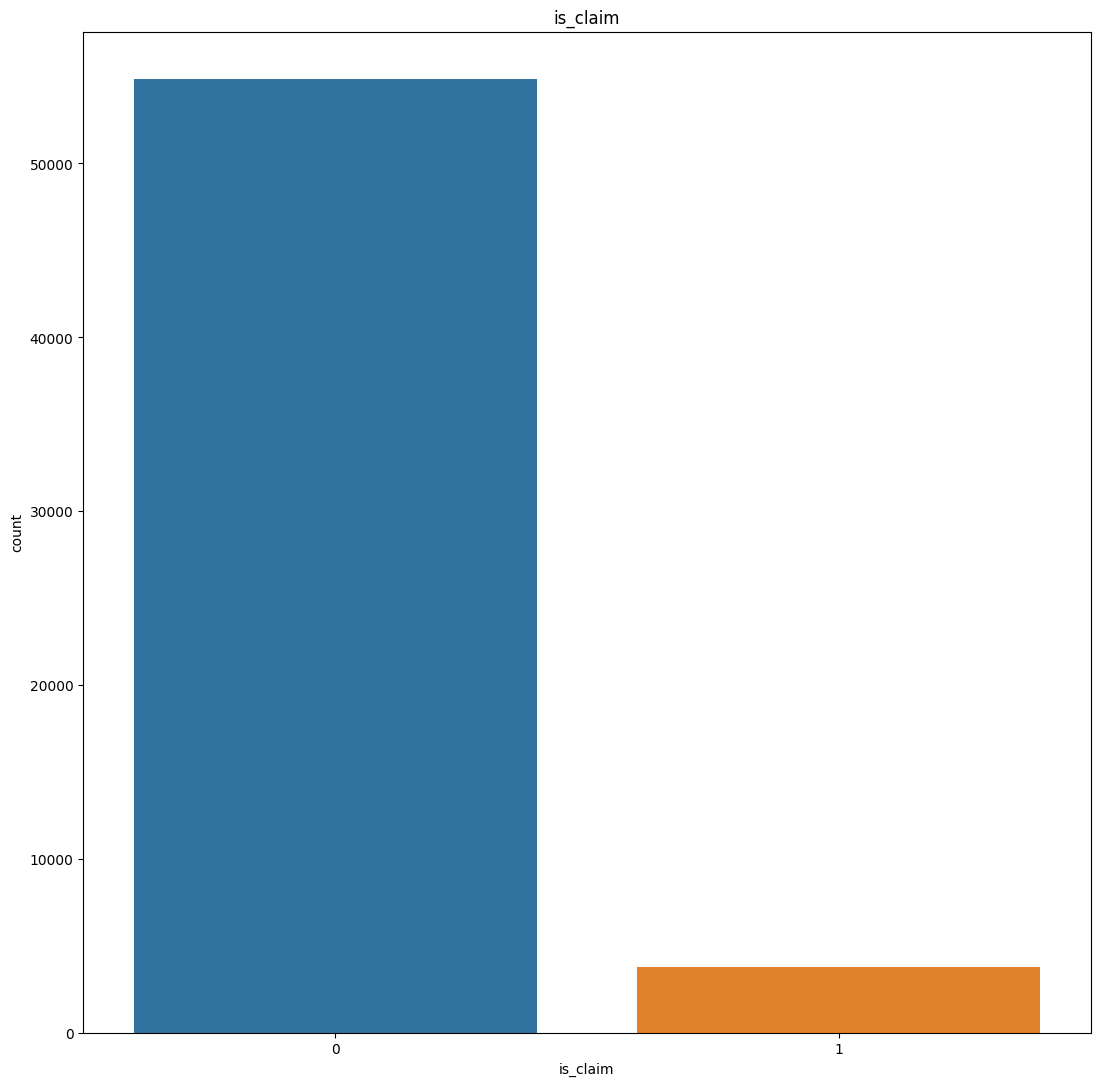

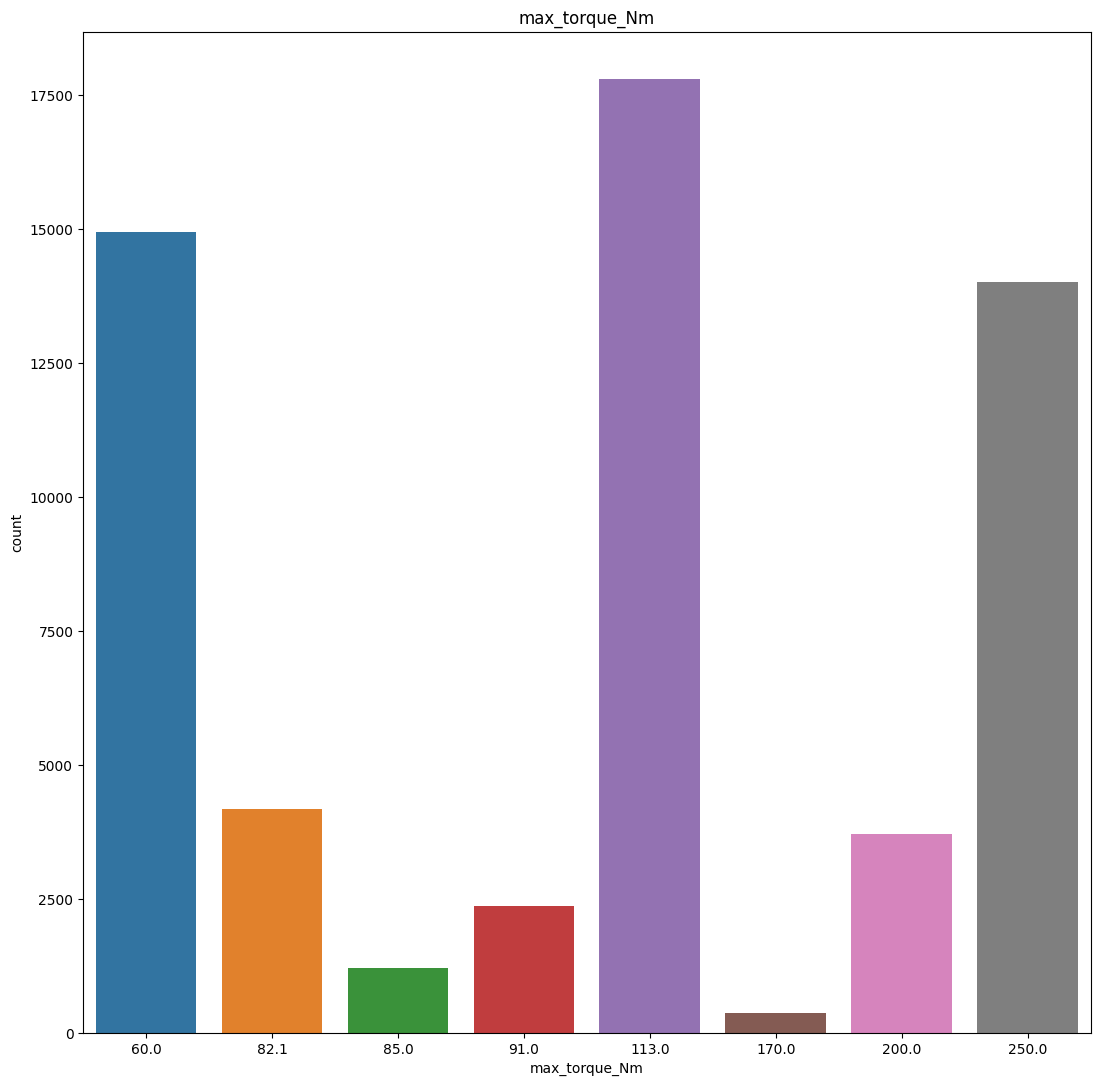

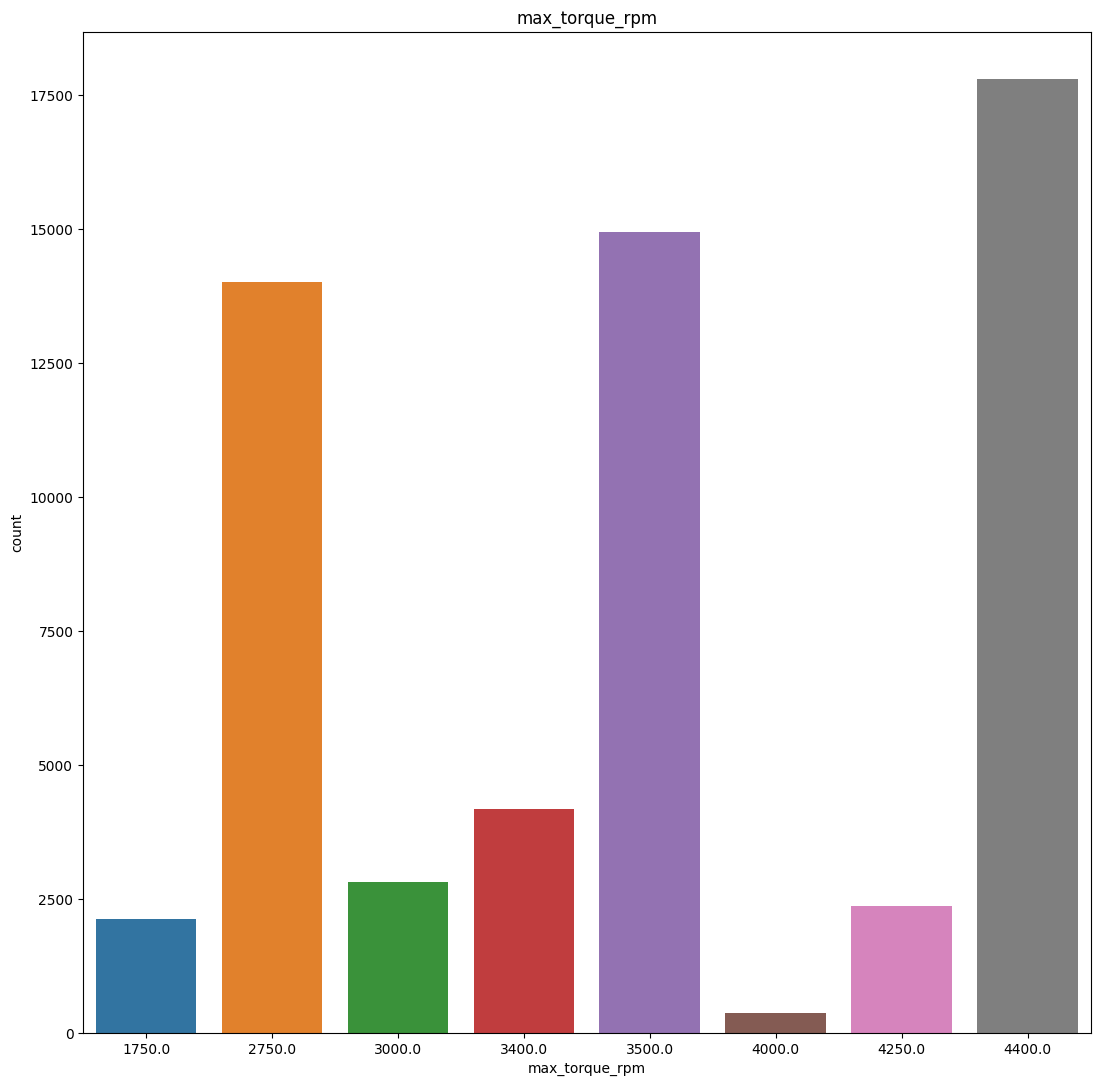

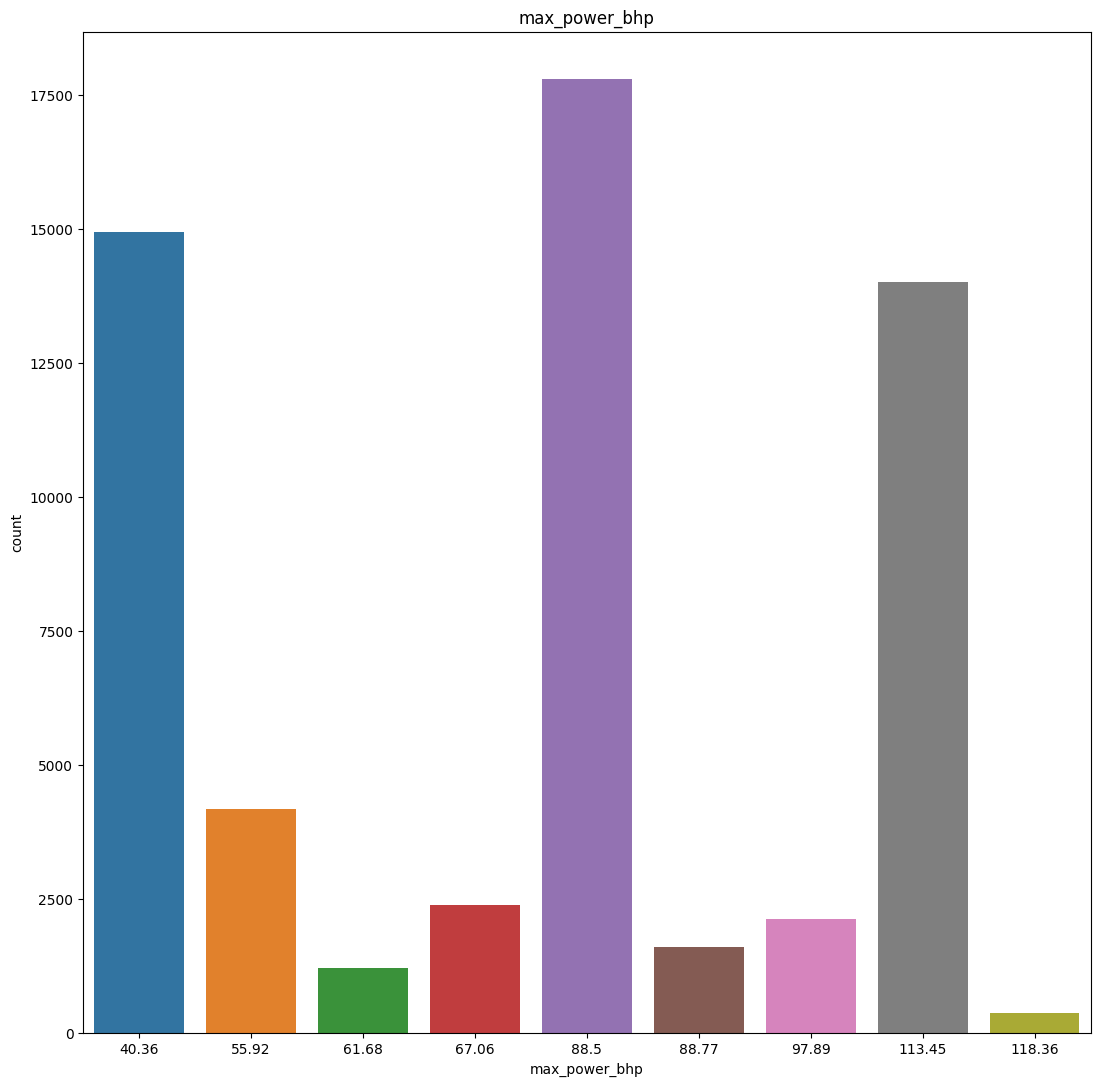

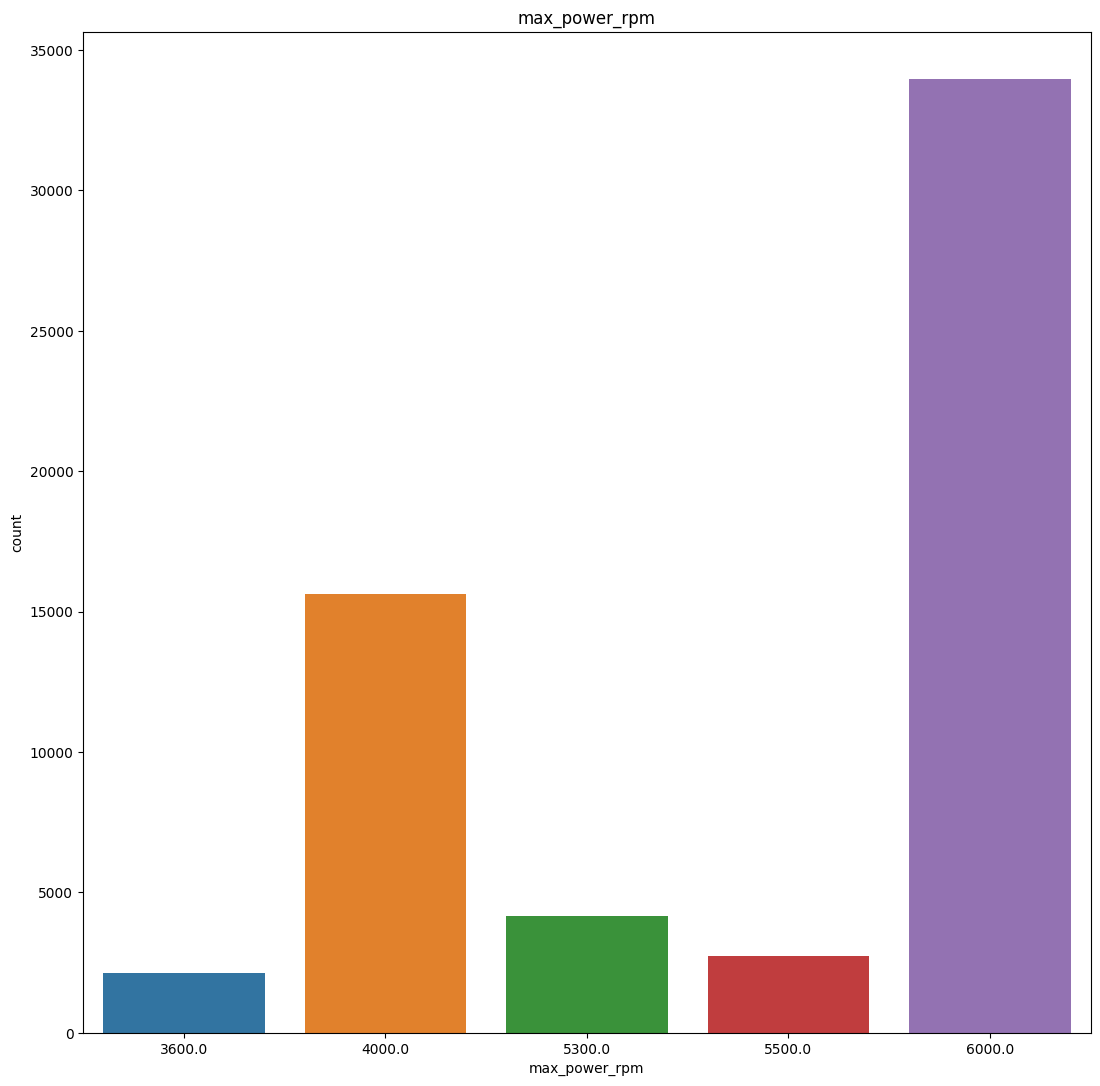

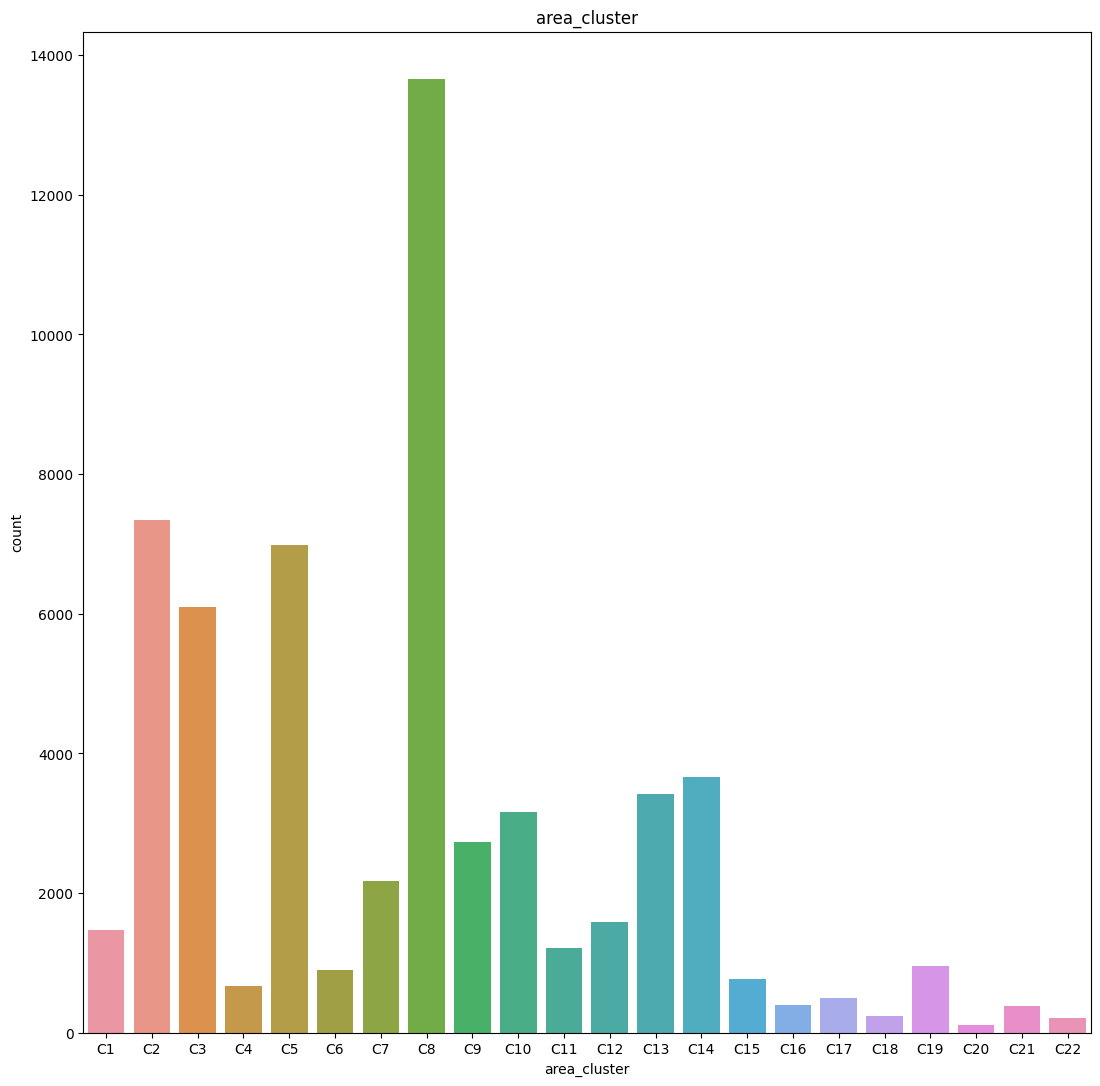

In [10]:
for i in cat_list:
    plt.figure(figsize=(13,13))
    sb.countplot(x=i,data=data.loc[:,cat_list])
    plt.title(i)

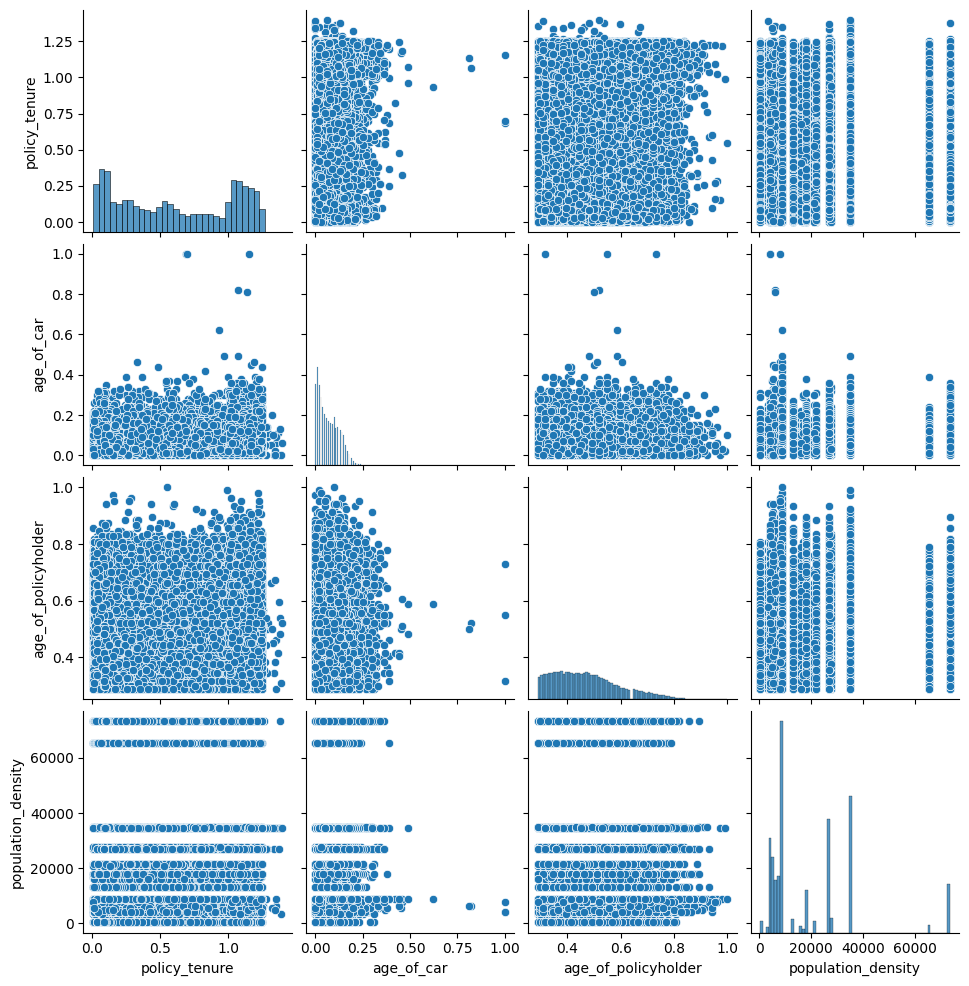

In [19]:
sb.pairplot(data.loc[:,num_list])


array([[<Axes: title={'center': 'policy_tenure'}>,
        <Axes: title={'center': 'age_of_car'}>,
        <Axes: title={'center': 'age_of_policyholder'}>,
        <Axes: title={'center': 'population_density'}>,
        <Axes: title={'center': 'make'}>],
       [<Axes: title={'center': 'segment'}>,
        <Axes: title={'center': 'airbags'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinder'}>,
        <Axes: title={'center': 'gear_box'}>],
       [<Axes: title={'center': 'turning_radius'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'gross_weight'}>],
       [<Axes: title={'center': 'ncap_rating'}>,
        <Axes: title={'center': 'is_claim'}>,
        <Axes: title={'center': 'max_torque_Nm'}>,
        <Axes: title={'center': 'max_torque_rpm'}>,
        <Axes: title={'center': 'max_power_bhp'}>],
       [<Axes: title={'cente

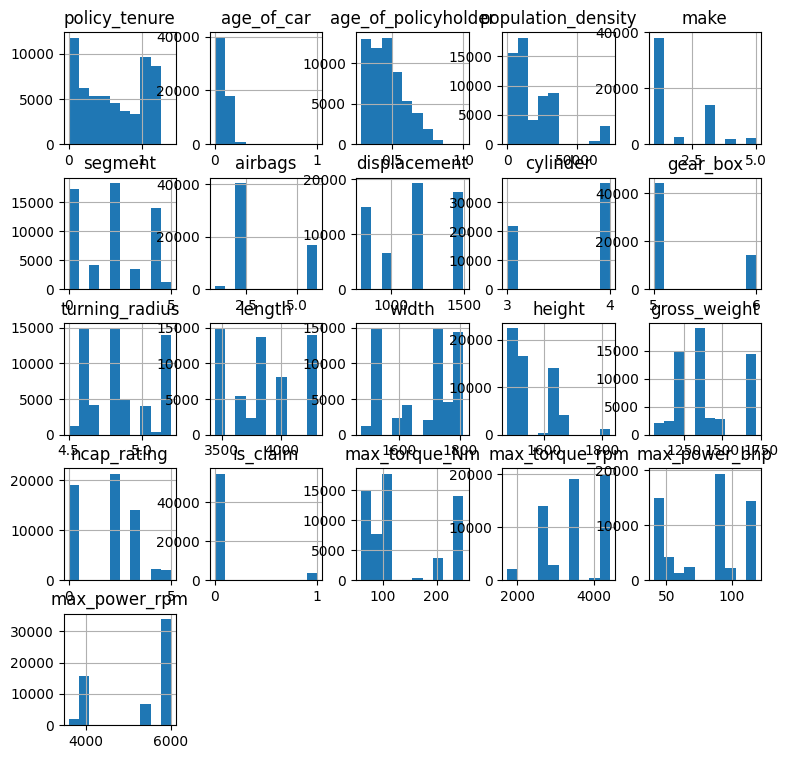

In [11]:
data.hist(figsize=(9,9))


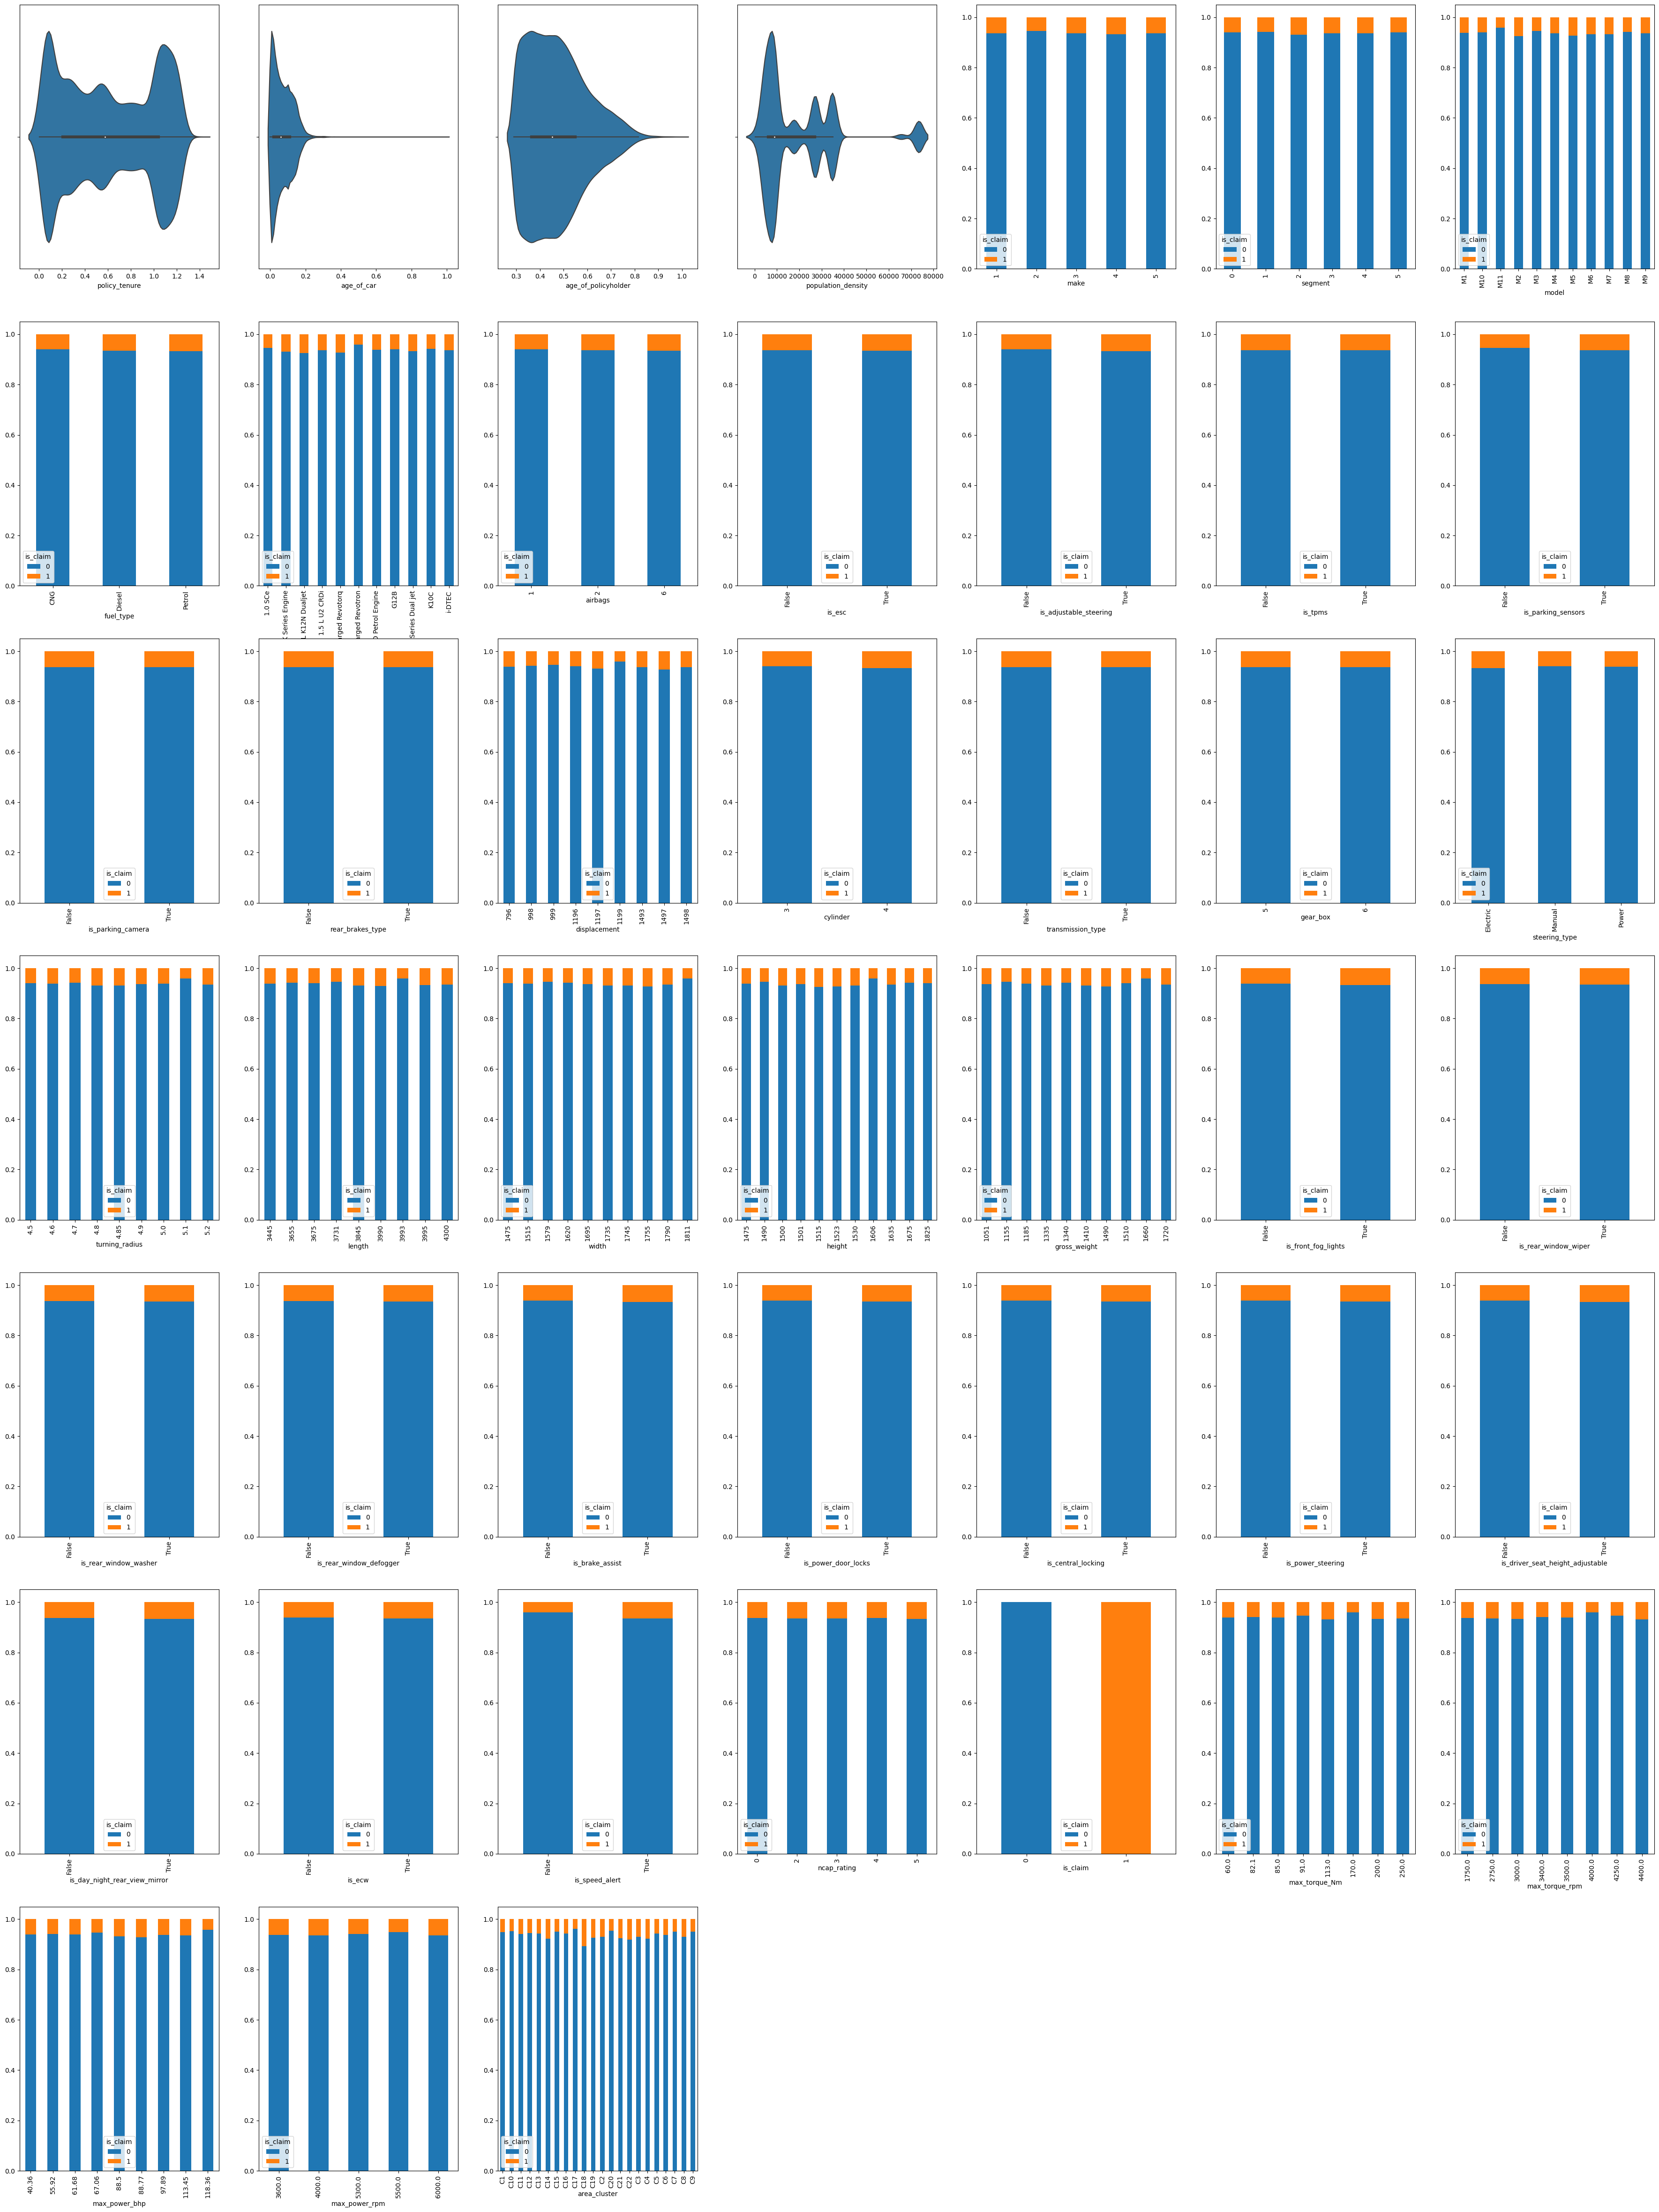

In [32]:
plt.figure(figsize=(45,60))
import math
num_rows = math.ceil(math.sqrt(len(num_list)+len(cat_list)))

for (index,num) in enumerate(num_list):
    plt.subplot(num_rows,num_rows,index+1)
    sb.violinplot(x =num,hue ='is_claim', data=data)

for (index,cat) in enumerate(cat_list):
    plt.subplot(num_rows,num_rows,len(num_list)+index+1)
    category_proportions = data.groupby(cat)['is_claim'].value_counts(normalize=True).unstack()
    category_proportions.plot(kind='bar', stacked=True, ax=plt.gca())

plt.show()

In [69]:
data['segment'] = data['segment'].replace({'A': 0, 'B1': 1, 'B2': 2, 'C1': 3, 'C2': 4,'Utility': 5})
data['rear_brakes_type'] = data['rear_brakes_type'].replace({'Disc':True,'Drum':False})
data['transmission_type'] = data['transmission_type'].replace({'Automatic':True,'Manual':False})

partial_data = data.loc[:,num_list + ["displacement",
"is_speed_alert",
"area_cluster",
"engine_type",
"model",
"turning_radius",
"length",
"width",
"height",
"gross_weight",
"max_torque_Nm",
"max_torque_rpm",
"max_power_bhp",
"is_claim"]]

categorical_cols = data.select_dtypes(include=['object']).columns

categories_encoded_data = pd.get_dummies(data, columns=categorical_cols)

categories_encoded_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58168 entries, 0 to 58591
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58168 non-null  float64
 1   age_of_car                             58168 non-null  float64
 2   age_of_policyholder                    58168 non-null  float64
 3   population_density                     58168 non-null  int64  
 4   make                                   58168 non-null  int64  
 5   segment                                58168 non-null  int64  
 6   airbags                                58168 non-null  int64  
 7   is_esc                                 58168 non-null  bool   
 8   is_adjustable_steering                 58168 non-null  bool   
 9   is_tpms                                58168 non-null  bool   
 10  is_parking_sensors                     58168 non-null  bool   
 11  is

In [70]:
from sklearn.model_selection import train_test_split

inputs = categories_encoded_data.drop("is_claim", axis=1)
labels = categories_encoded_data['is_claim'].values

inputs_train, inputs_test, label_train, label_test = train_test_split(inputs,labels,test_size = 0.20)

Like we said previously, the data is skewed in terms of the label. This means we need to balance the data somehow. We'll try different method and see which yields better results:
<ul>
<li>Doing nothing at all</li>
<li>Random Oversampling</li>
<li>Random Undersampling</li>
<li>SMOTENC (Oversampling)</li>
<li>ENN (Undersampling)</li>
<li>SMOTEENN (Hybrid)</li>
</ul>

In [71]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler


ros = RandomOverSampler()
inputs_train_ros,label_train_ros = ros.fit_resample(inputs_train,label_train)

smote = SMOTE()
inputs_train_smote,label_train_smote = smote.fit_resample(inputs_train,label_train)

rus = RandomUnderSampler()
inputs_train_rus,label_train_rus = rus.fit_resample(inputs_train,label_train)


enn = EditedNearestNeighbours()
inputs_train_enn,label_train_enn = enn.fit_resample(inputs_train,label_train)


smoteenn = SMOTEENN()
inputs_train_smoteen,label_train_smoteen = smoteenn.fit_resample(inputs_train,label_train)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
#from keras.models import Sequential
#from keras.layers import Dense
#import tensorflow as tf
import numpy as np
from sklearn.linear_model import Perceptron


clf_1 = KNeighborsClassifier()
clf_2 = DecisionTreeClassifier()

#clf_3 = Sequential()
#clf_3.add(Dense(64, activation='sigmoid', input_dim=inputs_train_smoteen.shape[1]))
#clf_3.add(Dense(64, activation='sigmoid'))
#clf_3.add(Dense(1, activation='sigmoid')) 
#clf_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf_3 = KNeighborsClassifier()
clf_4 = GaussianNB()
clf_5 = Perceptron()

clf_list = [clf_1,clf_2,clf_3,clf_4,clf_5]

def apply_model_and_get_stats(model,x_train,y_train,x_test,y_test, is_neural_network):

    if is_neural_network:
        return
        x_train = np.array(x_train, dtype=np.float32)
        y_train = np.array(y_train, dtype=np.float32)
        x_test = np.array(x_test, dtype=np.float32)
        y_test = np.array(y_test, dtype=np.float32)

        x_train = tf.convert_to_tensor(x_train)
        y_train = tf.convert_to_tensor(y_train)
        x_test = tf.convert_to_tensor(x_test)
        y_test = tf.convert_to_tensor(y_test)
        
        clf.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


        y_pred = model.predict(x_test)
        y_pred = (y_pred > 0.5)
    
    else:
        # Make predictions on the test data
        y_pred = model.predict(x_test)
    

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='binary')

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='binary')

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='binary')

    # Print the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    return y_pred

balancing_algorithms = [(inputs_train, label_train), (inputs_train_ros, label_train_ros), (inputs_train_rus, label_train_rus),
(inputs_train_smote,label_train_smote), (inputs_train_enn,label_train_enn ),(inputs_train_smoteen,label_train_smoteen)]
balancing_algorithm_str = ["nothing","Random Oversampling", "Random Undersampling", "smote","enn","smoteenn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    print(balancing_algorithm_str[index])
    for index2,clf in enumerate(clf_list):
        print(clf)
        print(index2==2)
        if(index2!=2):
            clf.fit(inputs,label)
        y_pred = apply_model_and_get_stats(clf,inputs,label,inputs_test,label_test,index2==2)
        print()
        print()
    print()
    print()
    print()

nothing
KNeighborsClassifier()
False
Accuracy: 0.9309781674402613
Precision: 0.13513513513513514
Recall: 0.006443298969072165
F1-score: 0.01230012300123001


DecisionTreeClassifier()
False
Accuracy: 0.8679731820526044
Precision: 0.07964601769911504
Recall: 0.09278350515463918
F1-score: 0.0857142857142857


KNeighborsClassifier()
True


GaussianNB()
False


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9332989513494928
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Perceptron()
False


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9332989513494928
Precision: 0.0
Recall: 0.0
F1-score: 0.0





Random Oversampling
KNeighborsClassifier()
False
Accuracy: 0.7913013580883617
Precision: 0.08492462311557789
Recall: 0.21778350515463918
F1-score: 0.12219812002892261


DecisionTreeClassifier()
False
Accuracy: 0.8831872099020114
Precision: 0.09230769230769231
Recall: 0.08505154639175258
F1-score: 0.08853118712273642


KNeighborsClassifier()
True


GaussianNB()
False
Accuracy: 0.43235344679388
Precision: 0.07071302298173247
Recall: 0.6185567010309279
F1-score: 0.12691697514542571


Perceptron()
False
Accuracy: 0.6051229155922296
Precision: 0.06135110294117647
Recall: 0.3440721649484536
F1-score: 0.10413416536661467





Random Undersampling
KNeighborsClassifier()
False
Accuracy: 0.5436651194773938
Precision: 0.08051082731815658
Recall: 0.5605670103092784
F1-score: 0.14079948211684737


DecisionTreeClassifier()
False
Accuracy: 0.5412583806085611
Precision: 0.07572093023255815
Recall: 0.5244845360824743
F1-score: 0

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9332989513494928
Precision: 0.0
Recall: 0.0
F1-score: 0.0





smote
KNeighborsClassifier()
False
Accuracy: 0.7083548220732336
Precision: 0.08552423186569529
Recall: 0.3479381443298969
F1-score: 0.13729977116704806


DecisionTreeClassifier()
False
Accuracy: 0.8512119649303764
Precision: 0.08942390369733448
Recall: 0.13402061855670103
F1-score: 0.1072717895822589


KNeighborsClassifier()
True


GaussianNB()
False
Accuracy: 0.427797833935018
Precision: 0.0704163623082542
Recall: 0.6211340206185567
F1-score: 0.1264925862747671


Perceptron()
False
Accuracy: 0.07168643630737494
Precision: 0.06681071737251512
Recall: 0.9961340206185567
F1-score: 0.12522274420865057





enn
KNeighborsClassifier()
False
Accuracy: 0.913529310641224
Precision: 0.11666666666666667
Recall: 0.045103092783505154
F1-score: 0.06505576208178439


DecisionTreeClassifier()
False
Accuracy: 0.8372013065153859
Precision: 0.09197080291970802
Recall: 0.16237113402061856
F1-score: 0.11742777260018639


KNeighbors

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9332989513494928
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Perceptron()
False


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9332989513494928
Precision: 0.0
Recall: 0.0
F1-score: 0.0





smoteenn
KNeighborsClassifier()
False
Accuracy: 0.6426852329379406
Precision: 0.08576329331046312
Recall: 0.45103092783505155
F1-score: 0.14412188593782171


DecisionTreeClassifier()
False
Accuracy: 0.7925906824823792
Precision: 0.09975550122249388
Recall: 0.26288659793814434
F1-score: 0.1446295639844027


KNeighborsClassifier()
True


GaussianNB()
False
Accuracy: 0.4151624548736462
Precision: 0.07016543069024529
Recall: 0.634020618556701
F1-score: 0.1263482280431433


Perceptron()
False
Accuracy: 0.7126525700532921
Precision: 0.0705921712947474
Recall: 0.27190721649484534
F1-score: 0.11208499335989375







As we can see, doing nothing and ENN provides us the best results. Of these two, we decided to use ENN since we find it important to have a balanced dataset

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
#from keras.models import Sequential
#from keras.layers import Dense
#import tensorflow as tf
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron


param_grid = {
    'n_neighbors': [3, 5, 7],
    'max_depth': [None, 5, 10],
}


clf_1 = KNeighborsClassifier()
clf_2 = DecisionTreeClassifier()
#clf_3 = svm.SVC(kernel='linear')
clf_3 = GaussianNB()
clf_4 = Perceptron()


clf_list = [clf_1,clf_2,clf_3,clf_4]

def apply_model_and_get_stats(model,x_train,y_train,x_test,y_test):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    return y_pred

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

param_grid_gaussian_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],
}

param_grid_perceptron = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
}


param_grids = [param_grid_knn,param_grid_decision_tree,param_grid_gaussian_nb,param_grid_perceptron]

balancing_algorithms = [
    (inputs_train, label_train),
    (inputs_train_enn, label_train_enn),
]
balancing_algorithm_str = ["nothing","enn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    print(balancing_algorithm_str[index])
    for index2,clf in enumerate(clf_list):
        print(clf)
        param_grid = param_grids[index2]
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(inputs, label)
        best_model = grid_search.best_estimator_

        y_pred = apply_model_and_get_stats(best_model, inputs, label, inputs_test, label_test)
        print()
        print()
    print()
    print()
    print()

nothing
KNeighborsClassifier()


KeyboardInterrupt: 